In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [2]:
# import all libraries and dependencies for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [3]:
ngo=pd.read_csv("Country-data.csv")

In [4]:
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
word=pd.read_csv("data-dictionary+.csv")

In [6]:
word.head()

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...


#### shape checking of the data 

In [7]:
ngo.shape

(167, 10)

In [8]:
ngo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
ngo.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [10]:
ngo.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### Exploratory Data Analytics

###### Univariate Analysis

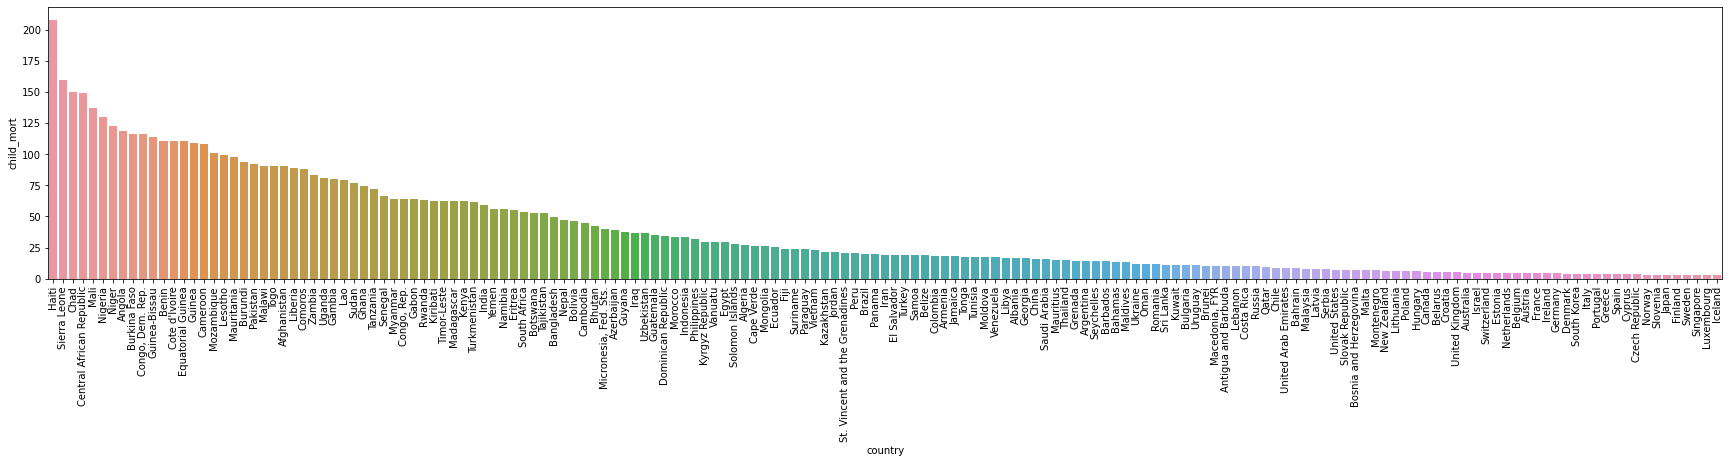

In [11]:
plt.figure(figsize=(30,5))
child_mort=ngo[["country","child_mort"]].sort_values("child_mort",ascending=False)
ax=sns.barplot(x="country",y="child_mort",data=child_mort)
plt.xticks(rotation=90)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

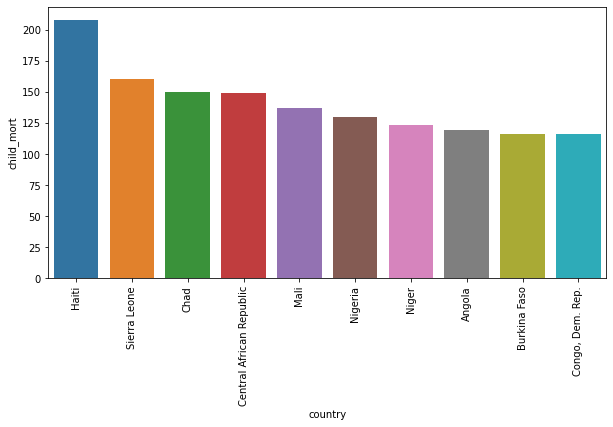

In [12]:
plt.figure(figsize=(10,5))
child_mort_Top10=ngo[["country","child_mort"]].sort_values("child_mort",ascending=False).head(10)
ax=sns.barplot(x="country",y="child_mort",data=child_mort_Top10)
plt.xticks(rotation=90)

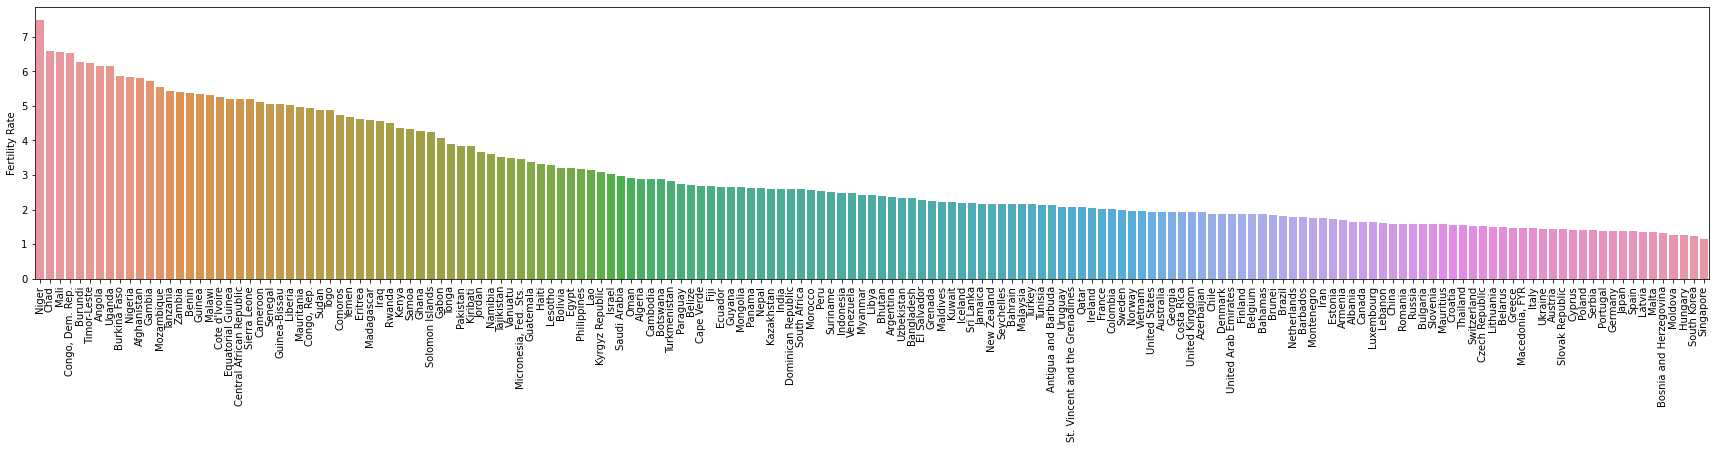

In [13]:
#Fertility Rate:The number of children that bwould be born to each woman if the current age-Fertility rates remain the same
plt.figure(figsize=(30,5))
total_fer=ngo[["country","total_fer"]].sort_values("total_fer",ascending=False)
ax=sns.barplot(x="country",y="total_fer",data=total_fer)
ax.set(xlabel="",ylabel="Fertility Rate")
plt.xticks(rotation=90)
plt.show()

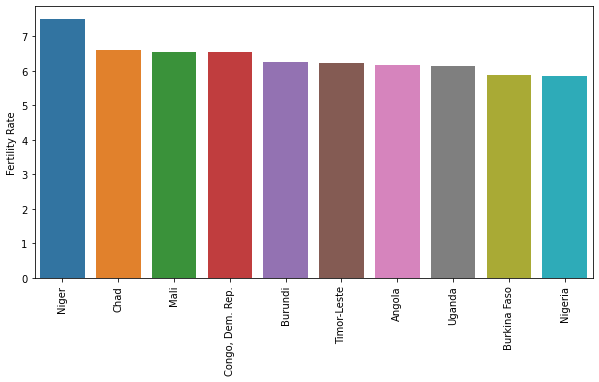

In [14]:
plt.figure(figsize=(10,5))
total_fer_top10=ngo[["country","total_fer"]].sort_values("total_fer",ascending=False).head(10)
ax=sns.barplot(x="country",y="total_fer",data=total_fer_top10)
ax.set(xlabel="",ylabel="Fertility Rate")
plt.xticks(rotation=90)
plt.show()

###### Life Expectancy:The average number of years a new born child would live if the current mortali patterns are to remain same

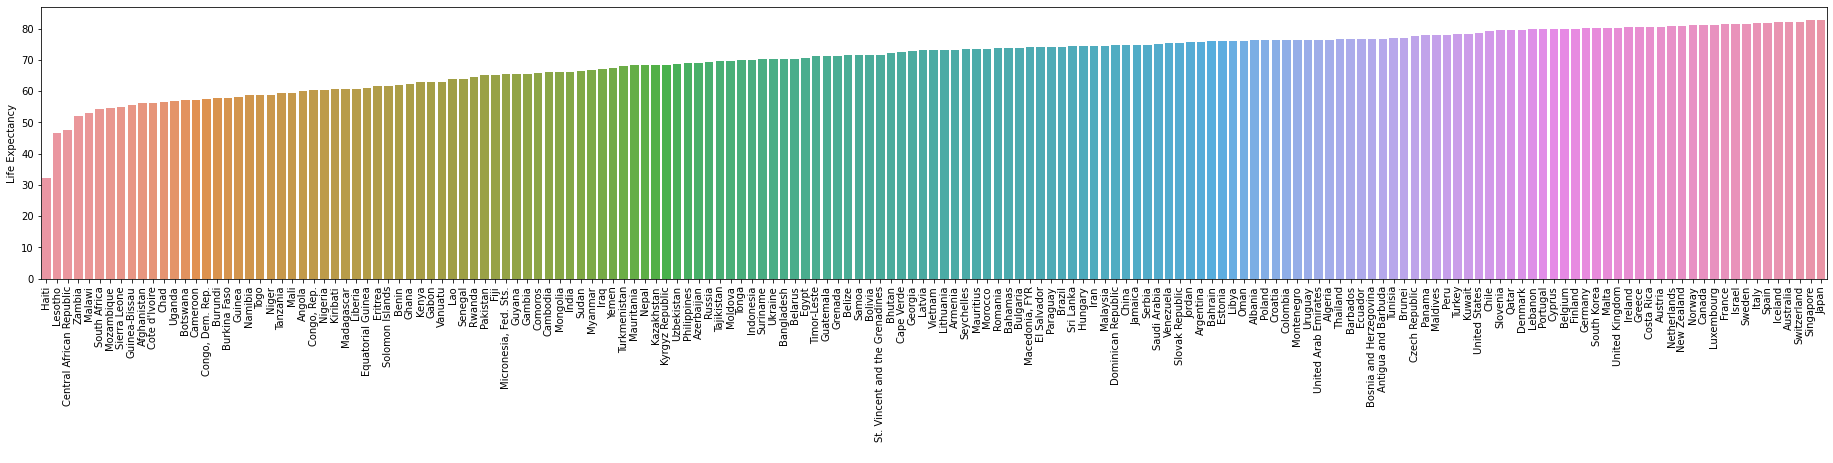

In [15]:
plt.figure(figsize=(32,5))
life_expec=ngo[["country","life_expec"]].sort_values("life_expec",ascending=True)
ax=sns.barplot(x="country",y="life_expec",data=life_expec)
ax.set(xlabel=" ",ylabel="Life Expectancy")
plt.xticks(rotation=90)
plt.show()


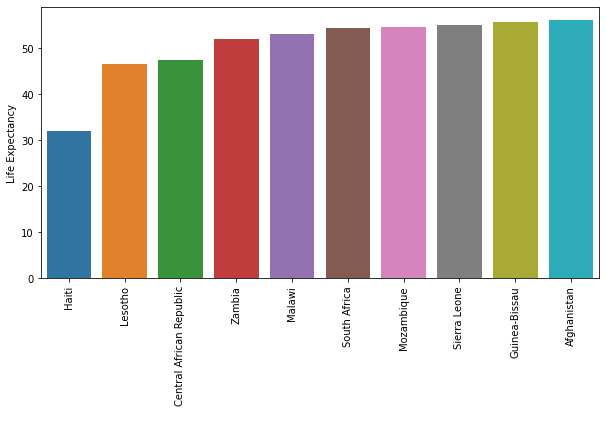

In [16]:
plt.figure(figsize=(10,5))
life_expec_bottom10=ngo[["country","life_expec"]].sort_values("life_expec",ascending=True).head(10)
ax=sns.barplot(x="country",y="life_expec",data=life_expec_bottom10)
ax.set(xlabel=" ",ylabel="Life Expectancy")
plt.xticks(rotation=90)
plt.show()

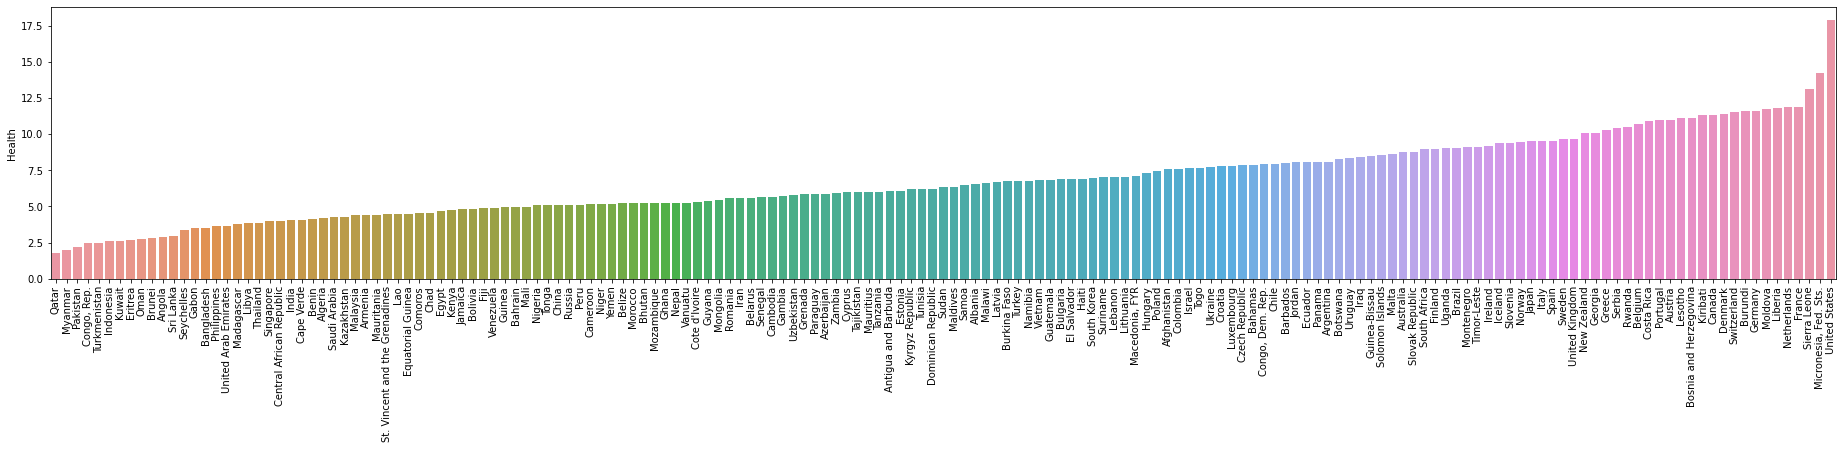

In [17]:
#health:Total health spending as %age of Total GDP
plt.figure(figsize=(32,5))
health=ngo[["country","health"]].sort_values("health",ascending=True)
ax=sns.barplot(x="country",y="health",data=health)
ax.set(xlabel=" ",ylabel="Health")
plt.xticks(rotation=90)
plt.show()

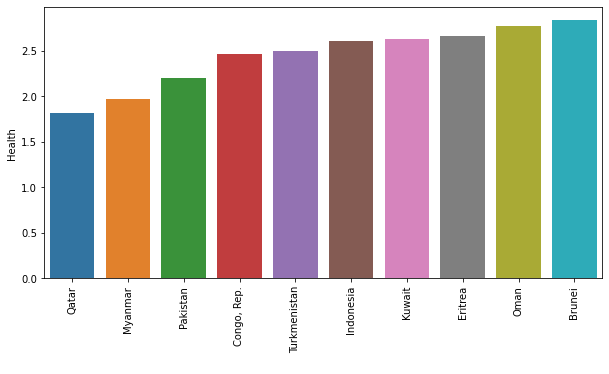

In [18]:
plt.figure(figsize=(10,5))
health_Bottom10=ngo[["country","health"]].sort_values("health",ascending=True).head(10)
ax=sns.barplot(x="country",y="health",data=health_Bottom10)
ax.set(xlabel=" ",ylabel="Health")
plt.xticks(rotation=90)
plt.show()

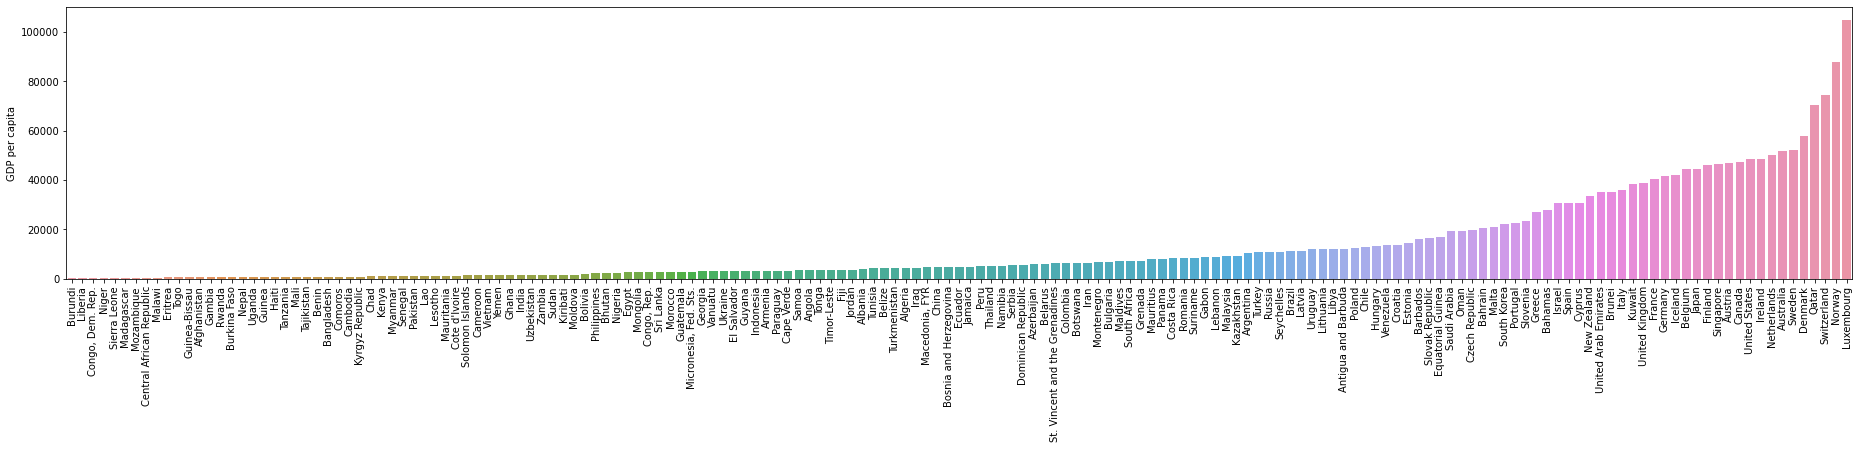

In [19]:
plt.figure(figsize=(32,5))
gdpp=ngo[["country","gdpp"]].sort_values("gdpp",ascending=True)
ax=sns.barplot(x="country",y="gdpp",data=gdpp)
ax.set(xlabel=" ",ylabel="GDP per capita")
plt.xticks(rotation=90)
plt.show()

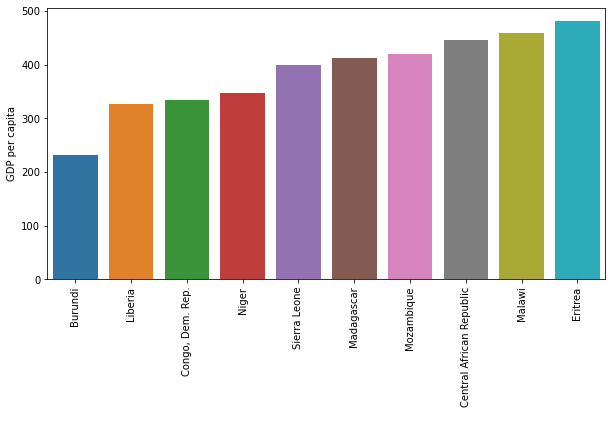

In [20]:
plt.figure(figsize=(10,5))
gdpp_top10=ngo[["country","gdpp"]].sort_values("gdpp",ascending=True).head(10)
ax=sns.barplot(x="country",y="gdpp",data=gdpp_top10)
ax.set(xlabel=" ",ylabel="GDP per capita")
plt.xticks(rotation=90)
plt.show()

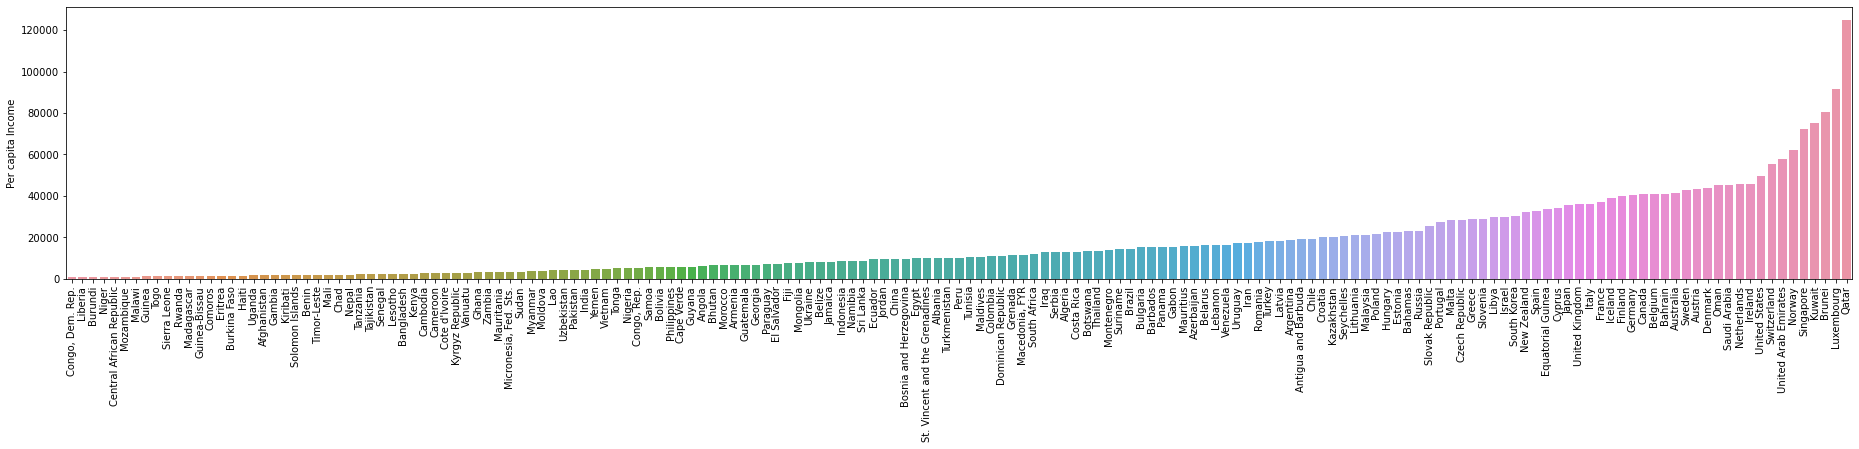

In [21]:
# Per capita Income : Net income per person
plt.figure(figsize = (32,5))
income = ngo[['country','income']].sort_values('income', ascending = True)
ax = sns.barplot(x='country', y='income', data=income)
ax.set(xlabel = '', ylabel= 'Per capita Income')
plt.xticks(rotation=90)
plt.show()

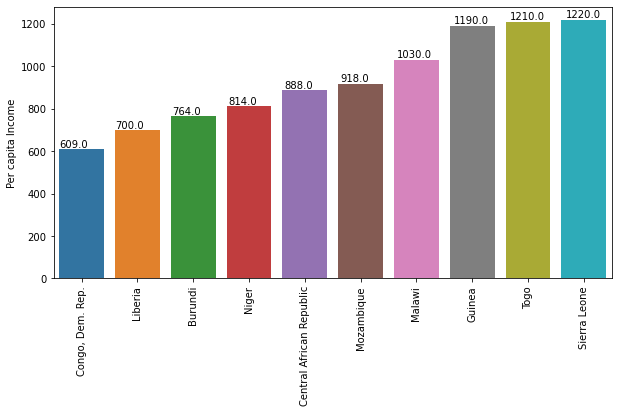

In [22]:
plt.figure(figsize = (10,5))
income_bottom10 = ngo[['country','income']].sort_values('income', ascending = True).head(10)
ax = sns.barplot(x='country', y='income', data= income_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Per capita Income')
plt.xticks(rotation=90)
plt.show()

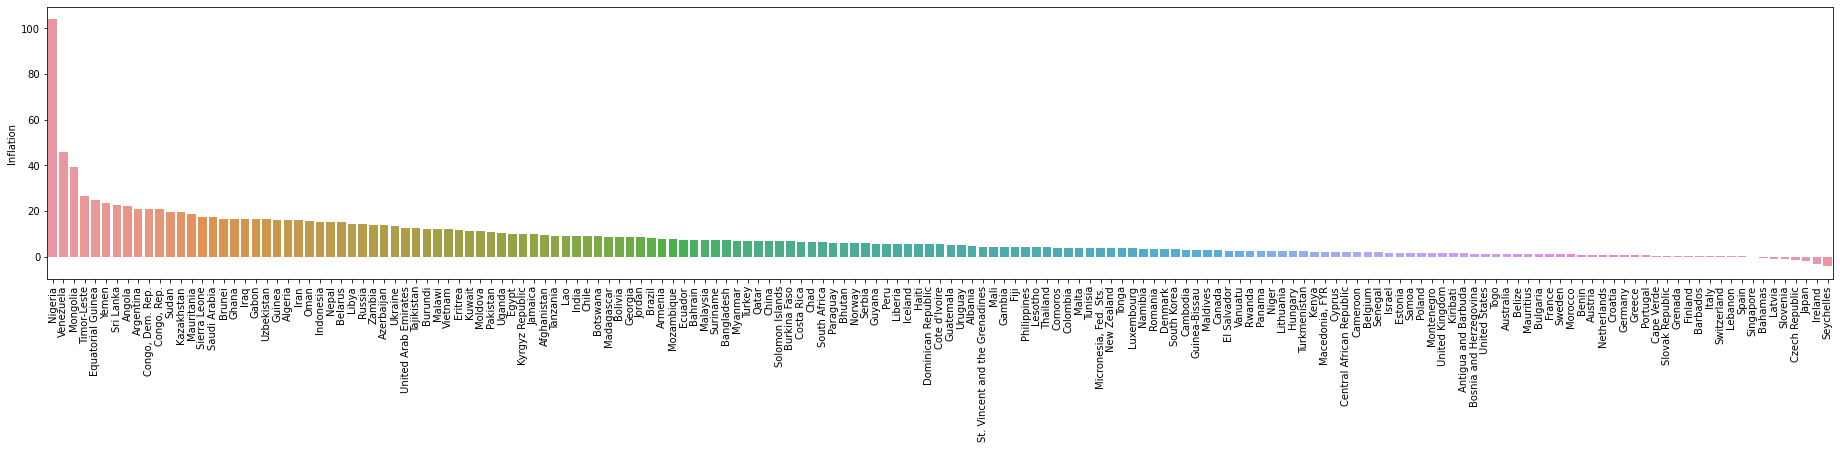

In [23]:
# Inflation: The measurement of the annual growth rate of the Total GDP
plt.figure(figsize = (32,5))
inflation = ngo[['country','inflation']].sort_values('inflation', ascending = False)
ax = sns.barplot(x='country', y='inflation', data= inflation)
ax.set(xlabel = '', ylabel= 'Inflation')
plt.xticks(rotation=90)
plt.show()

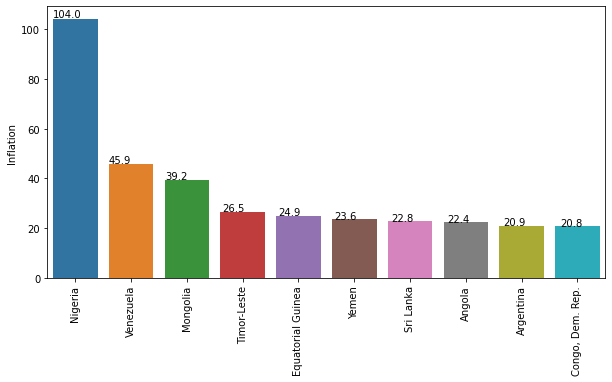

In [24]:
plt.figure(figsize = (10,5))
inflation_top10 = ngo[['country','inflation']].sort_values('inflation', ascending = False).head(10)
ax = sns.barplot(x='country', y='inflation', data= inflation_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Inflation')
plt.xticks(rotation=90)
plt.show()

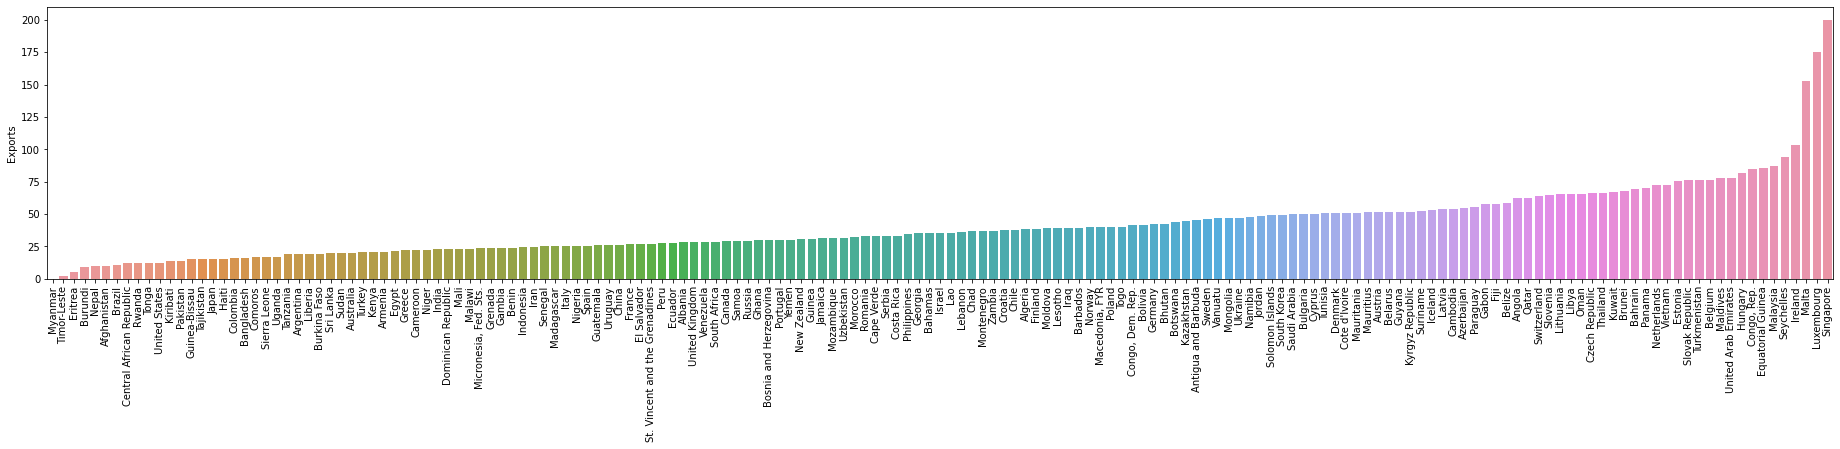

In [25]:
# Exports: Exports of goods and services. Given as %age of the Total GDP
plt.figure(figsize = (32,5))
exports = ngo[['country','exports']].sort_values('exports', ascending = True)
ax = sns.barplot(x='country', y='exports', data= exports)
ax.set(xlabel = '', ylabel= 'Exports')
plt.xticks(rotation=90)
plt.show()

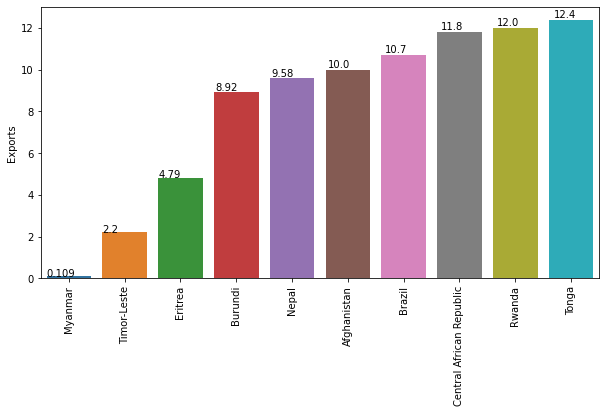

In [26]:
plt.figure(figsize = (10,5))
exports_bottom10 = ngo[['country','exports']].sort_values('exports', ascending = True).head(10)
ax = sns.barplot(x='country', y='exports', data= exports_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Exports')
plt.xticks(rotation=90)
plt.show()

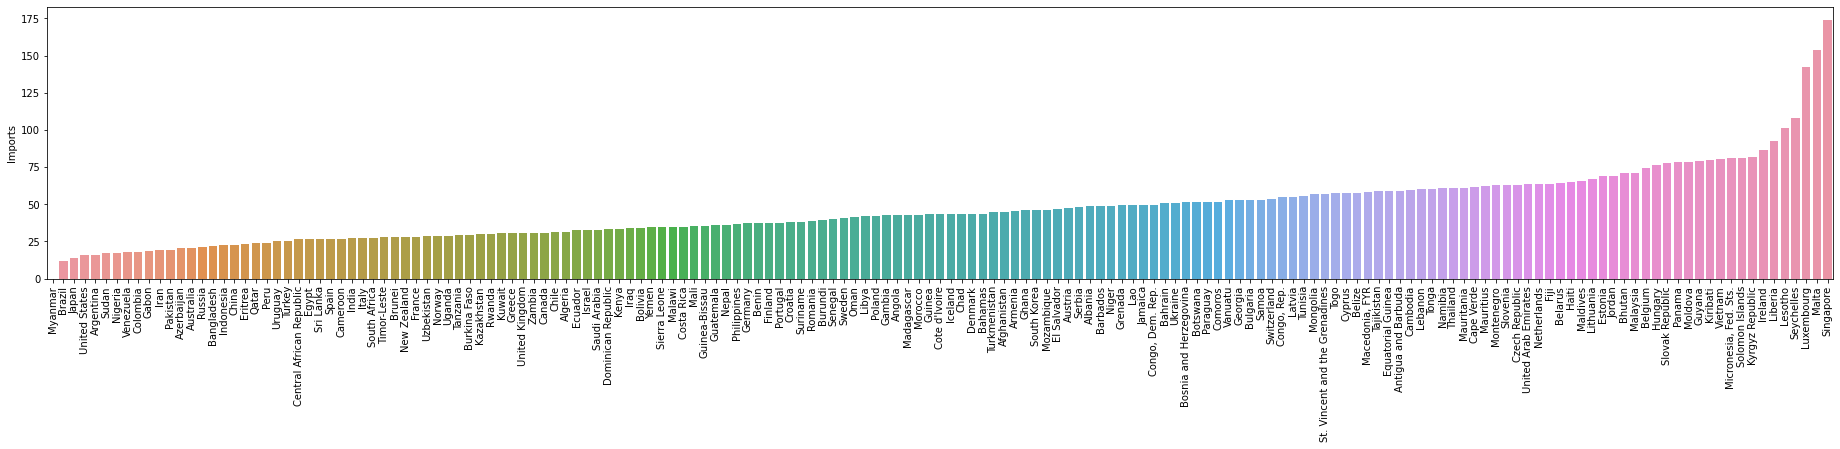

In [27]:
# Imports: Imports of goods and services. Given as %age of the Total GDP
plt.figure(figsize = (32,5))
imports = ngo[['country','imports']].sort_values('imports', ascending = True)
ax = sns.barplot(x='country', y='imports', data= imports)
ax.set(xlabel = '', ylabel= 'Imports')
plt.xticks(rotation=90)
plt.show()

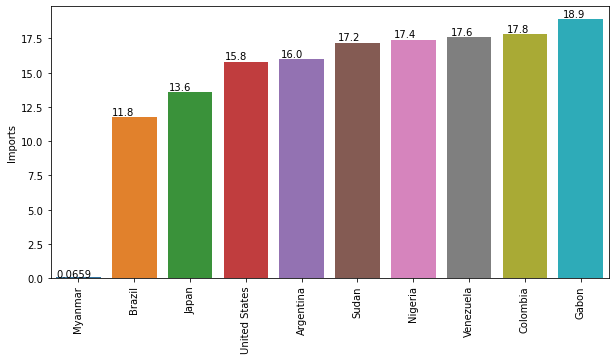

In [28]:
plt.figure(figsize = (10,5))
imports_bottom10 = ngo[['country','imports']].sort_values('imports', ascending = True).head(10)
ax = sns.barplot(x='country', y='imports', data= imports_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Imports')
plt.xticks(rotation=90)
plt.show()

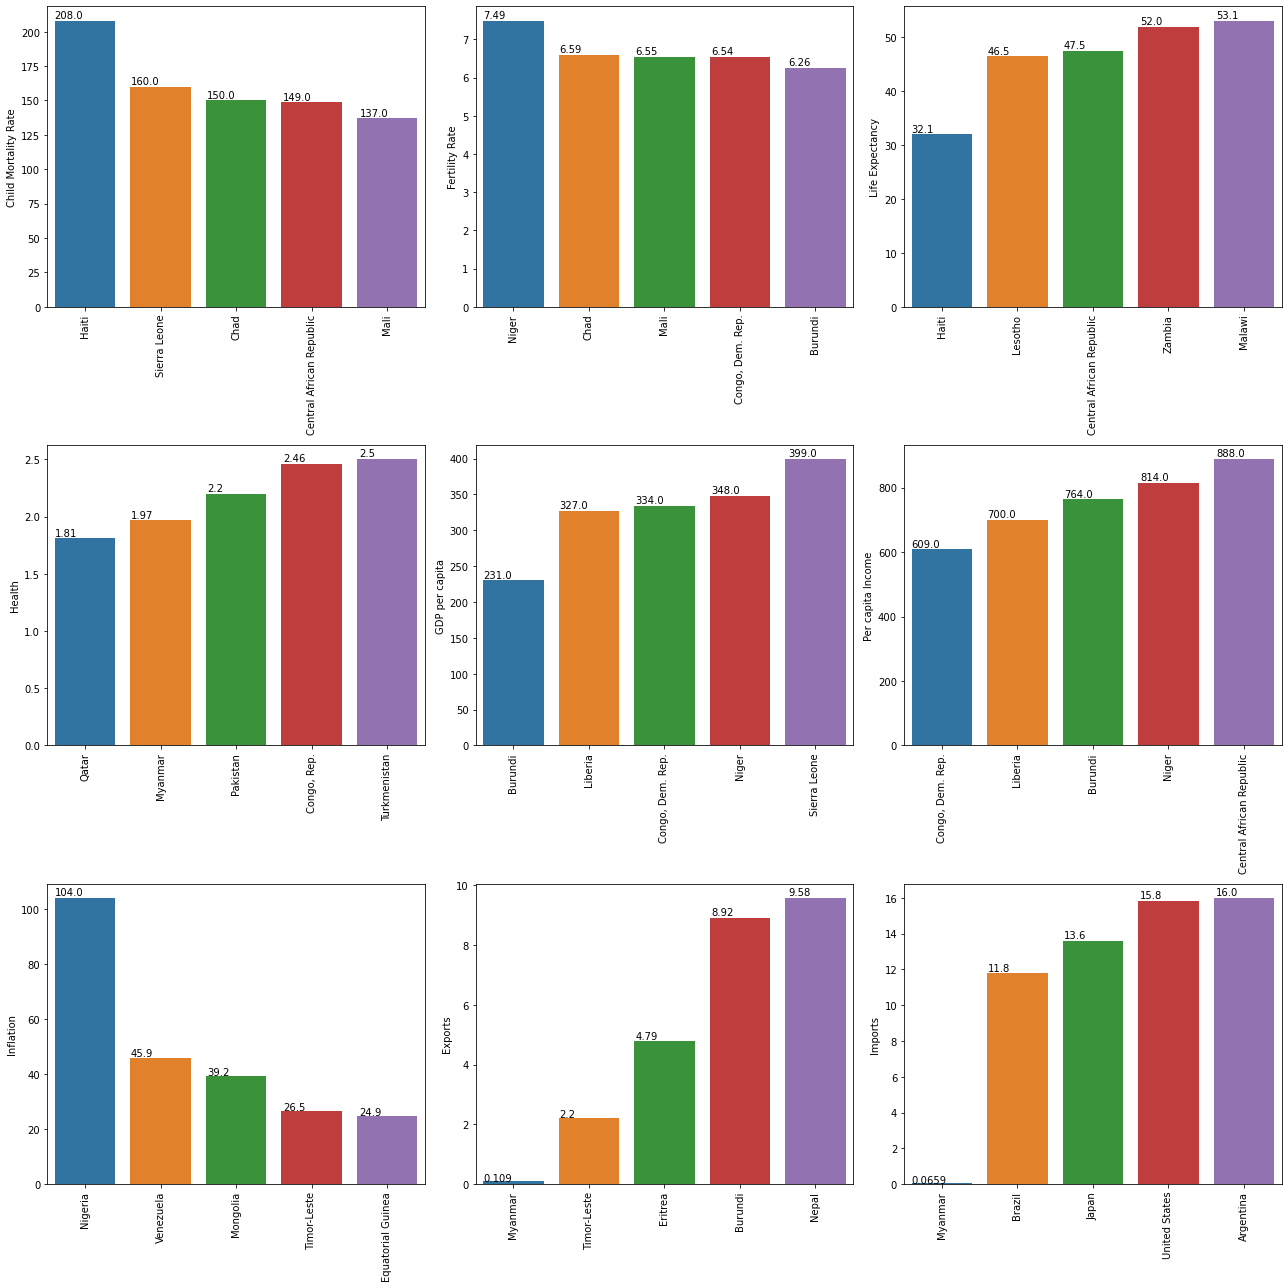

In [29]:
fig, axs = plt.subplots(3,3,figsize = (18,18))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top5_child_mort = ngo[['country','child_mort']].sort_values('child_mort', ascending = False).head()
ax = sns.barplot(x='country', y='child_mort', data= top5_child_mort, ax = axs[0,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top5_total_fer = ngo[['country','total_fer']].sort_values('total_fer', ascending = False).head()
ax = sns.barplot(x='country', y='total_fer', data= top5_total_fer, ax = axs[0,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom5_life_expec = ngo[['country','life_expec']].sort_values('life_expec', ascending = True).head()
ax = sns.barplot(x='country', y='life_expec', data= bottom5_life_expec, ax = axs[0,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bottom5_health = ngo[['country','health']].sort_values('health', ascending = True).head()
ax = sns.barplot(x='country', y='health', data= bottom5_health, ax = axs[1,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom5_gdpp = ngo[['country','gdpp']].sort_values('gdpp', ascending = True).head()
ax = sns.barplot(x='country', y='gdpp', data= bottom5_gdpp, ax = axs[1,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom5_income = ngo[['country','income']].sort_values('income', ascending = True).head()
ax = sns.barplot(x='country', y='income', data= bottom5_income, ax = axs[1,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

top5_inflation = ngo[['country','inflation']].sort_values('inflation', ascending = False).head()
ax = sns.barplot(x='country', y='inflation', data= top5_inflation, ax = axs[2,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom5_exports = ngo[['country','exports']].sort_values('exports', ascending = True).head()
ax = sns.barplot(x='country', y='exports', data= bottom5_exports, ax = axs[2,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom5_imports = ngo[['country','imports']].sort_values('imports', ascending = True).head()
ax = sns.barplot(x='country', y='imports', data= bottom5_imports, ax = axs[2,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('EDA')
plt.show()

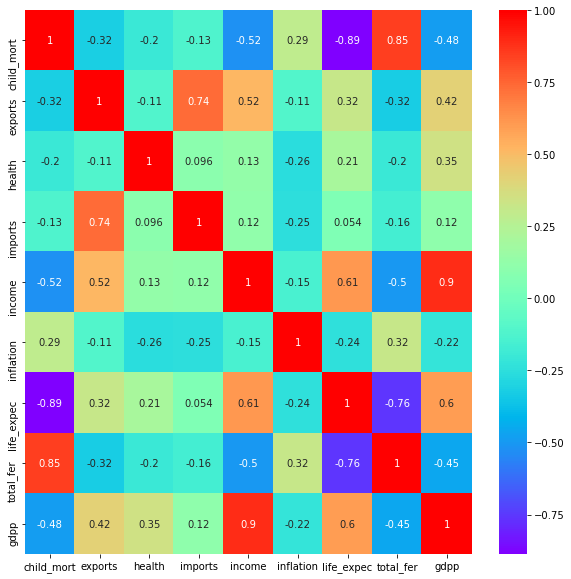

In [30]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10, 10))
sns.heatmap(ngo.corr(), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

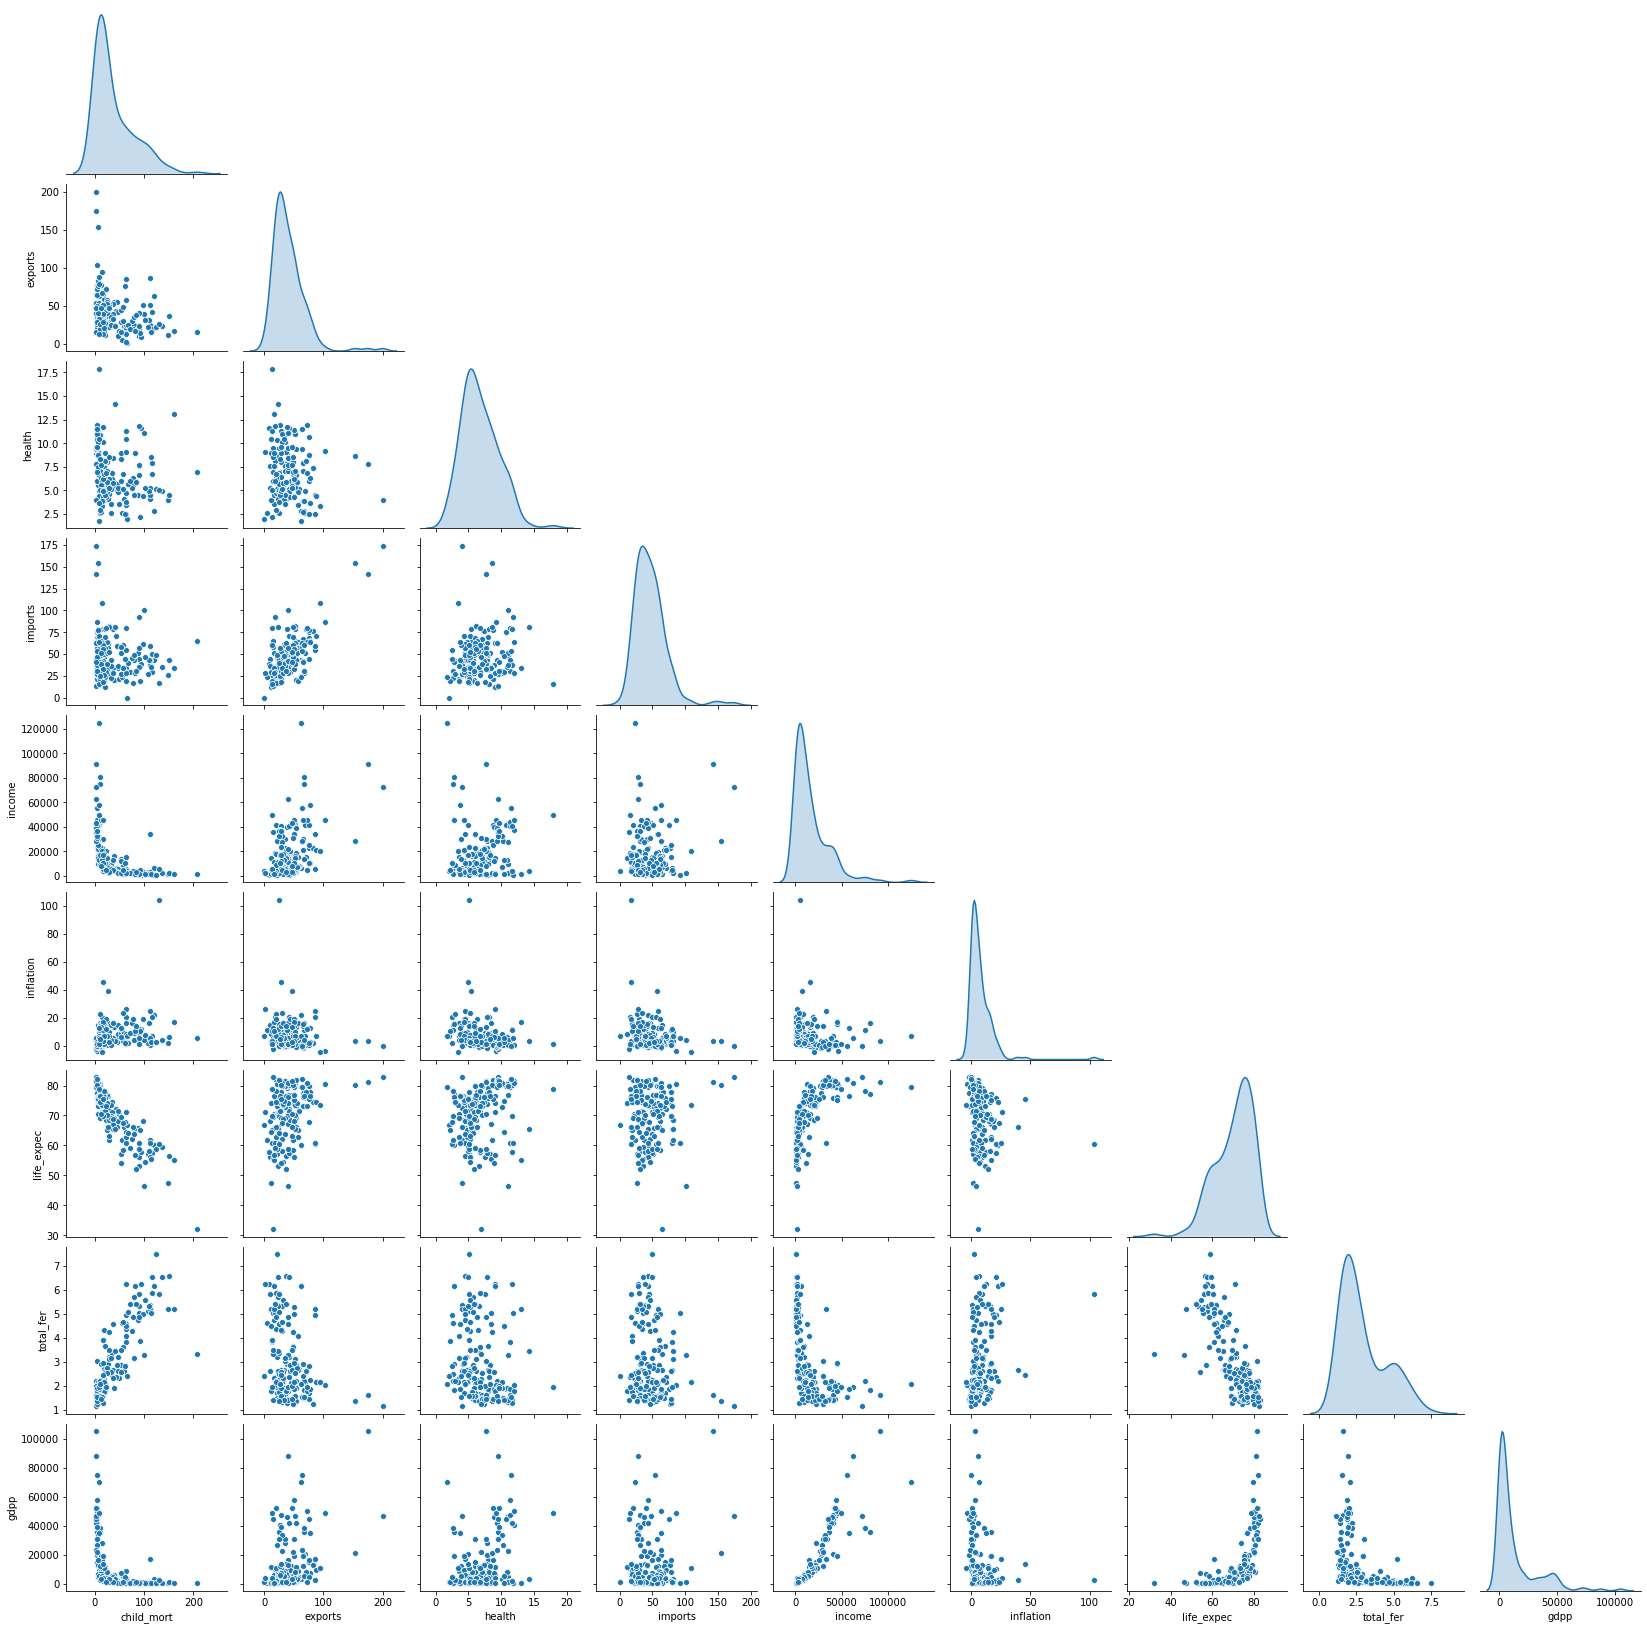

In [31]:
sns.pairplot(ngo,corner=True,diag_kind="kde")
plt.show()

# Data Preparation
Derived Metrices
Deducing imports,exports and health spending from percentage values to actual values of their GDP per capita .Because the percentage values don't give a clear picture of that country. For example few coutries Austria and Belarus have almost same exports % but their gdpp has a huge gap which doesn't give an accurate idea of which country is more developed than the other.

In [32]:
# Converting exports,imports and health spending percentages to absolute values.

ngo['exports'] = ngo['exports'] * ngo['gdpp']/100
ngo['imports'] = ngo['imports'] * ngo['gdpp']/100
ngo['health'] = ngo['health'] * ngo['gdpp']/100

In [33]:
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [34]:
# Dropping Country field as final dataframe will only contain data columns

ngo_drop = ngo.copy()
country = ngo_drop.pop('country')

In [35]:
ngo_drop.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# Rescaling the Features
Most software packages use SVD to compute the principal components and assume that the data is scaled and centred, so it is important to do standardisation/normalisation. There are two common ways of rescaling:

Min-Max scaling
Standardisation (mean-0, sigma-1)
Here, we will use Standardisation Scaling.

In [36]:
# Standarisation technique for scaling
scaler = StandardScaler()
ngo_scaled = scaler.fit_transform(ngo_drop)


In [37]:
ngo_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

# PCA Application
We are doing PCA because we want to remove the redundancies in the data and find the most important directions where the data was aligned. A somewhat similar heuristic is also used by the United Nations to calculate the Human Development Index(HDI) to rank countries on the basis of their development.

Principal component analysis (PCA) is one of the most commonly used dimensionality reduction techniques in the industry. By converting large data sets into smaller ones containing fewer variables, it helps in improving model performance, visualising complex data sets, and in many more areas.

Let's use PCA for dimensionality reduction as from the heatmap it is evident that correlation exists between the attributes.

In [38]:
pca = PCA(svd_solver='randomized', random_state=50)

In [39]:
pca.fit(ngo_scaled)

PCA(random_state=50, svd_solver='randomized')

In [40]:
# PCA components created 

pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [41]:
# Variance Ratio

pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

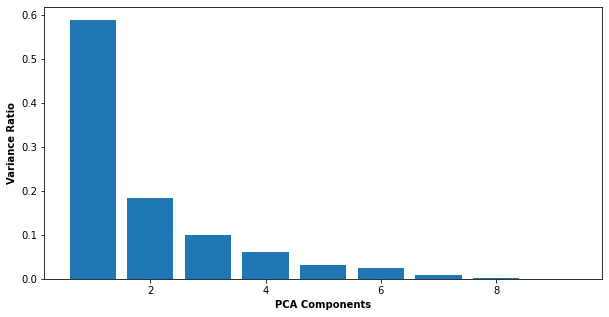

In [42]:
# Variance Ratio bar plot for each PCA components.
plt.figure(figsize = (10, 5))
ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

plt.show()

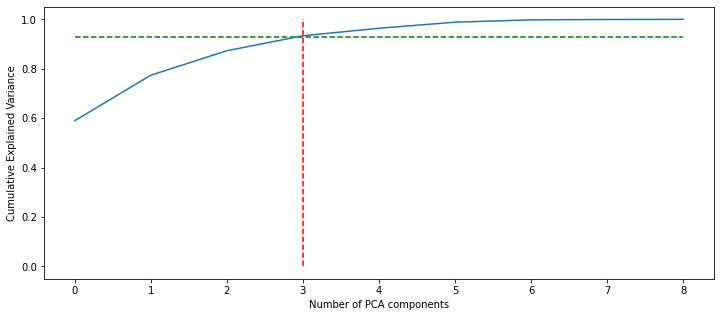

In [43]:
# Scree plot to visualize the Cumulative variance against the Number of components

fig = plt.figure(figsize = (12,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=3, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.93, xmax=8, xmin=0, colors="g", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

###### It is evident from the above Scree plot that more than 90% variance is explained by the first 3 principal components. Hence, we will use these components only going forward for Clustering process.

In [44]:
# Checking which attributes are well explained by the pca components

org_col = list(ngo.drop(['country'],axis=1).columns)
attributes_pca = pd.DataFrame({'Attribute':org_col,'PC_1':pca.components_[0],'PC_2':pca.components_[1],'PC_3':pca.components_[2]})

In [45]:
attributes_pca

,Attribute,PC_1,PC_2,PC_3
0,child_mort,-0.316392,0.476267,-0.150012
1,exports,0.342887,0.397311,-0.030574
2,health,0.358535,0.155053,-0.075703
3,imports,0.344865,0.370781,-0.072174
4,income,0.380041,0.128384,0.145764
5,inflation,-0.143085,0.221261,0.948419
6,life_expec,0.343857,-0.369820,0.196752
7,total_fer,-0.302842,0.459715,-0.077834
8,gdpp,0.399988,0.200624,0.010339


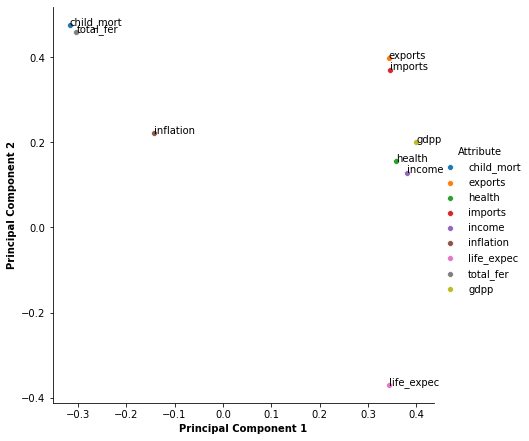

In [46]:
# Plotting the above dataframe for better visualization with PC1 and PC2

sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "Attribute" ,height=6)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 2",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_1[i],attributes_pca.PC_2[i]))

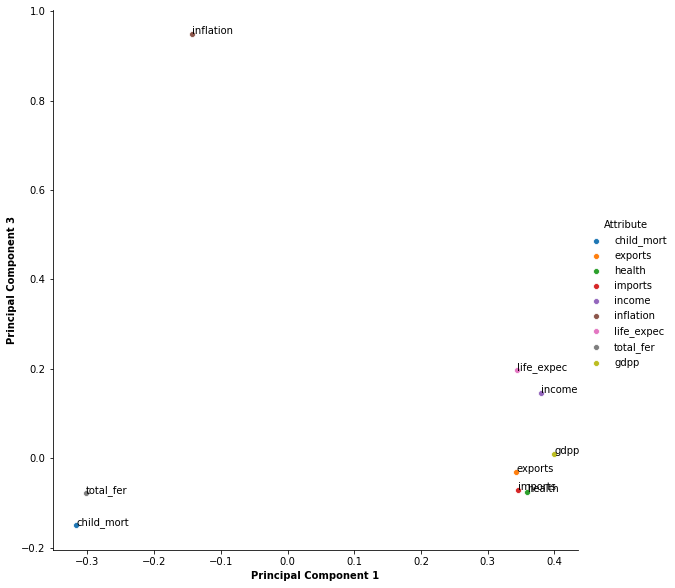

In [47]:
 #Plotting the above dataframe with PC1 and PC3 to understand the components which explains inflation.

sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_3"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 3",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_1[i],attributes_pca.PC_3[i]))

In [48]:
# Building the dataframe using Incremental PCA for better efficiency.

inc_pca = IncrementalPCA(n_components=3)

In [49]:
# Fitting the scaled df on incremental pca

df_inc_pca = inc_pca.fit_transform(ngo_scaled)
df_inc_pca

array([[-2.63744157e+00,  1.46903797e+00, -5.41359106e-01],
       [-2.22769569e-02, -1.43189586e+00, -2.07009539e-02],
       [-4.57626261e-01, -6.73300938e-01,  9.61867281e-01],
       [-2.72452030e+00,  2.17458267e+00,  6.06686548e-01],
       [ 6.49848516e-01, -1.02437392e+00, -2.50102847e-01],
       [ 3.71968554e-02, -6.80889086e-01,  1.46696276e+00],
       [-3.32691520e-01, -1.27451685e+00,  1.76636110e-01],
       [ 3.18036154e+00, -2.50784878e-01, -1.16877257e-01],
       [ 3.81568156e+00,  2.56083499e-01, -2.70495294e-01],
       [-4.67515152e-01, -4.93492360e-01,  6.03288028e-01],
       [ 1.49875246e+00, -4.28907400e-01, -5.50237572e-01],
       [ 1.47097104e+00, -3.26795693e-01,  4.28411771e-01],
       [-1.01419903e+00, -7.11807758e-01, -1.16988551e-01],
       [ 8.45238116e-01, -1.00860625e+00, -4.17261615e-01],
       [-1.34473920e-02, -9.82186148e-01,  8.80913018e-01],
       [ 3.96087770e+00,  8.38740841e-01, -2.94077196e-01],
       [-4.02707071e-01, -9.21816189e-01

In [50]:
df_pca = pd.DataFrame(df_inc_pca, columns=["PC_1", "PC_2","PC_3"])
df_pca_final = pd.concat([country, df_pca], axis=1)
df_pca_final.head()

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Albania,-0.022277,-1.431896,-0.020701
2,Algeria,-0.457626,-0.673301,0.961867
3,Angola,-2.724520,2.174583,0.606687
4,Antigua and Barbuda,0.649849,-1.024374,-0.250103


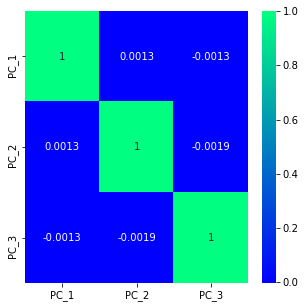

In [51]:
# Plotting Heatmap to check is there still dependency in the dataset.

plt.figure(figsize = (5,5))        
ax = sns.heatmap(df_pca_final.corr(),annot = True,cmap='winter')

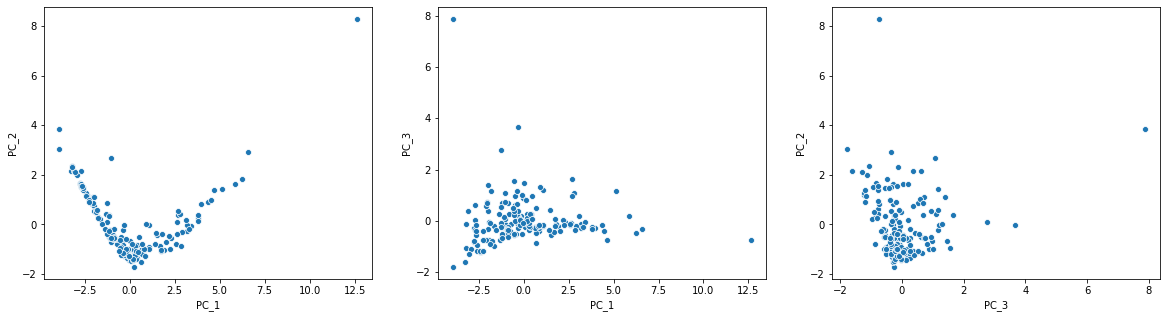

In [52]:
# Scatter Plot to visualize the spread of data across PCA components

plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
sns.scatterplot(data=df_pca_final, x='PC_1', y='PC_2')
plt.subplot(1,3,2)
sns.scatterplot(data=df_pca_final, x='PC_1', y='PC_3')
plt.subplot(1,3,3)
sns.scatterplot(data=df_pca_final, x='PC_3', y='PC_2')
plt.show()

Outlier Analysis
Visualization each columns using violinplot

5 reasons why we used a violin graph over boxplot

Violin graph is like box plot, but better
Violin graph is like density plot, but much useful
Violin graph is visually intuitive and attractive
Violin graph is non-parametric
There are many ways to use violin graphs

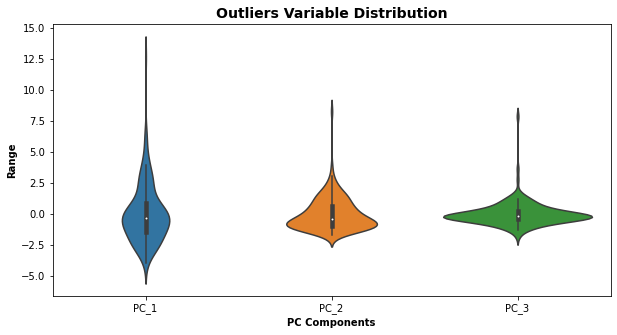

In [53]:
outliers = ['PC_1','PC_2','PC_3']
plt.rcParams['figure.figsize'] = [10,5]
sns.violinplot(data = df_pca_final[outliers])
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("PC Components", fontweight = 'bold')
plt.show()

In [54]:
# Statstical Outlier treatment for PC_1

Q1 = df_pca_final.PC_1.quantile(0.05)
Q3 = df_pca_final.PC_1.quantile(0.95)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PC_1 >= Q1) & (df_pca_final.PC_1 <= Q3)]

In [55]:
# Statstical Outlier treatment for PC_2

Q1 = df_pca_final.PC_2.quantile(0.05)
Q3 = df_pca_final.PC_2.quantile(0.95)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PC_2 >= Q1) & (df_pca_final.PC_2 <= Q3)]

In [56]:
# Statstical Outlier treatment for PC_3

Q1 = df_pca_final.PC_3.quantile(0.05)
Q3 = df_pca_final.PC_3.quantile(0.95)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PC_3 >= Q1) & (df_pca_final.PC_3 <= Q3)]

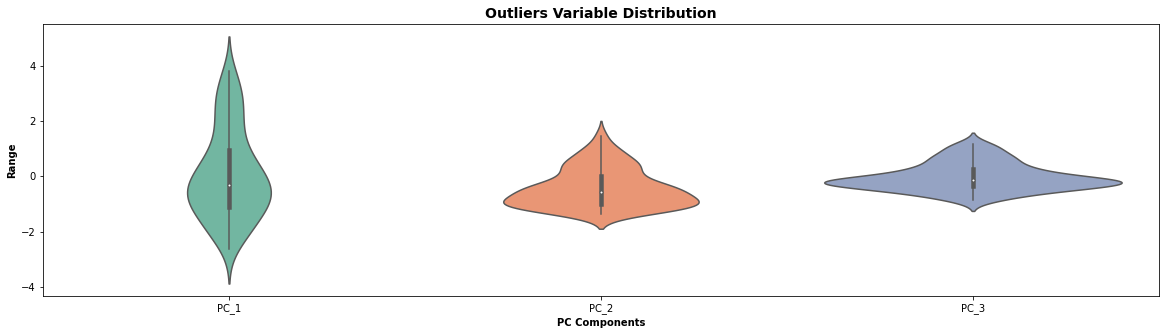

In [57]:
#Plot after Outlier removal 

outliers = ['PC_1','PC_2','PC_3']
plt.rcParams['figure.figsize'] = [20,5]
sns.violinplot(data = df_pca_final[outliers], orient="v", palette="Set2" )
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("PC Components", fontweight = 'bold')
plt.show()

In [58]:
# Reindexing the df after outlier removal

df_pca_final = df_pca_final.reset_index(drop=True)
df_pca_final_data = df_pca_final.drop(['country'],axis=1)
df_pca_final.head()

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Algeria,-0.457626,-0.673301,0.961867
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103
3,Armenia,-0.332692,-1.274517,0.176636
4,Australia,3.180362,-0.250785,-0.116877


In [59]:
#Calculating Hopkins score to know whether the data is good for clustering or not.

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS

In [60]:
# Hopkins score
Hopkins_score=round(hopkins(df_pca_final_data),2)

In [61]:
print("{} is a good Hopkins score for Clustering.".format(Hopkins_score))

0.77 is a good Hopkins score for Clustering.


# Model Building
K- means Clustering
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:

First we initialize k points, called means, randomly. We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far. We repeat the process for a given number of iterations and at the end, we have our clusters.

Finding the Optimal Number of Clusters
Elbow Curve to get the right number of Clusters
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

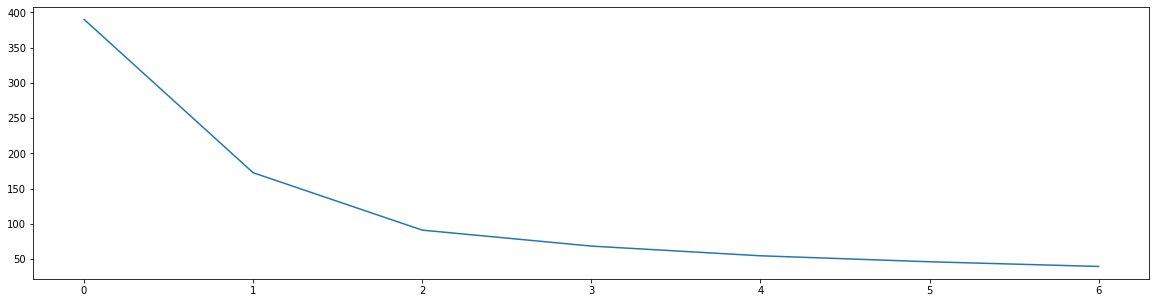

In [62]:
# Elbow curve method to find the ideal number of clusters.
ssd = []
for num_clusters in list(range(1,8)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_pca_final_data)
    ssd.append(model_clus.inertia_)

plt.plot(ssd);

# Silhouette Analysis
silhouette score=(p−q)/max(p,q)

p is the mean distance to the points in the nearest cluster that the data point is not a part of

q is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.



In [63]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(df_pca_final_data)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_pca_final_data, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


For n_clusters=2, the silhouette score is 0.4873400103541441
For n_clusters=3, the silhouette score is 0.4639771456218248
For n_clusters=4, the silhouette score is 0.39873565683671486
For n_clusters=5, the silhouette score is 0.3608535370443812
For n_clusters=6, the silhouette score is 0.3714796089348357
For n_clusters=7, the silhouette score is 0.3609446319381151
For n_clusters=8, the silhouette score is 0.34963655749979905


In [66]:
#K-means with k=4 clusters

cluster4 = KMeans(n_clusters=4, max_iter=150, random_state= 50)
cluster4.fit(df_pca_final_data)

KMeans(max_iter=150, n_clusters=4, random_state=50)

In [67]:
#Cluster labels

cluster4.labels_

array([3, 0, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 3, 2, 2, 0, 1, 0, 2,
       0, 0, 3, 3, 2, 1, 2, 0, 0, 0, 0, 3, 2, 0, 1, 1, 3, 3, 0, 1, 3, 2,
       0, 0, 0, 2, 1, 0, 0, 0, 3, 2, 1, 0, 1, 0, 0, 3, 1, 0, 3, 2, 3, 2,
       2, 3, 2, 2, 1, 3, 2, 0, 0, 0, 0, 3, 0, 1, 2, 3, 2, 0, 0, 0, 2, 2,
       2, 0, 3, 0, 2, 2, 1, 3, 3, 2, 1, 0, 3, 0, 1, 0, 3, 0, 0, 2, 0, 3,
       0, 1, 1, 1, 2, 0, 0, 0, 3])

In [68]:
# Assign the label

df_pca_final['Cluster_Id4'] = cluster4.labels_
df_pca_final.head()

,country,PC_1,PC_2,PC_3,Cluster_Id4
0,Afghanistan,-2.637442,1.469038,-0.541359,3
1,Algeria,-0.457626,-0.673301,0.961867,0
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,2
3,Armenia,-0.332692,-1.274517,0.176636,0
4,Australia,3.180362,-0.250785,-0.116877,1


In [69]:
# Number of countries in each cluster

df_pca_final['Cluster_Id4'].value_counts()

0    48
2    29
3    23
1    19
Name: Cluster_Id4, dtype: int64

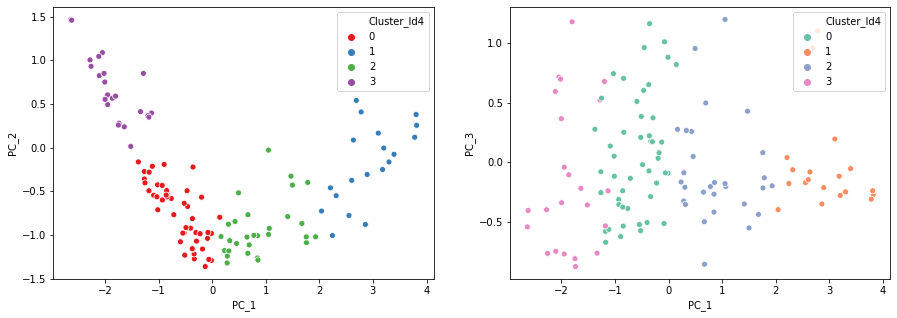

In [70]:
# Scatter plot on Principal components to visualize the spread of the data

fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id4',legend='full',palette="Set1",data=df_pca_final,ax=axes[0])
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id4',legend='full',palette="Set2",data=df_pca_final,ax=axes[1])
plt.show()

In [71]:
# Lets drop the Cluster Id created with 4 clusters and proceed with 5 clusters.

df_pca_final = df_pca_final.drop('Cluster_Id4',axis=1)

In [73]:
#K-means with k=5 clusters

cluster5 = KMeans(n_clusters=5, max_iter=120,random_state=70)
cluster5.fit(df_pca_final_data)

KMeans(max_iter=120, n_clusters=5, random_state=70)

In [74]:
# Cluster labels

cluster5.labels_

array([0, 1, 2, 1, 3, 3, 1, 2, 2, 4, 2, 1, 1, 4, 4, 4, 1, 1, 4, 3, 1, 1,
       1, 1, 0, 0, 2, 3, 2, 1, 1, 4, 1, 0, 2, 4, 3, 3, 0, 0, 1, 3, 0, 2,
       1, 4, 4, 2, 3, 4, 4, 1, 4, 2, 3, 1, 3, 1, 1, 0, 3, 4, 0, 2, 0, 1,
       2, 0, 1, 1, 3, 0, 1, 4, 1, 1, 4, 0, 4, 3, 2, 0, 1, 1, 1, 4, 2, 2,
       1, 1, 0, 4, 2, 2, 2, 4, 4, 2, 2, 1, 0, 1, 3, 4, 0, 4, 1, 1, 4, 0,
       1, 3, 3, 3, 1, 4, 4, 1, 0])

In [75]:
# assign the label

df_pca_final['Cluster_Id'] = cluster5.labels_
df_pca_final.head()

,country,PC_1,PC_2,PC_3,Cluster_Id
0,Afghanistan,-2.637442,1.469038,-0.541359,0
1,Algeria,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,2
3,Armenia,-0.332692,-1.274517,0.176636,1
4,Australia,3.180362,-0.250785,-0.116877,3


In [76]:
# Number of countries in each cluster

df_pca_final['Cluster_Id'].value_counts()

1    38
4    25
2    20
0    19
3    17
Name: Cluster_Id, dtype: int64

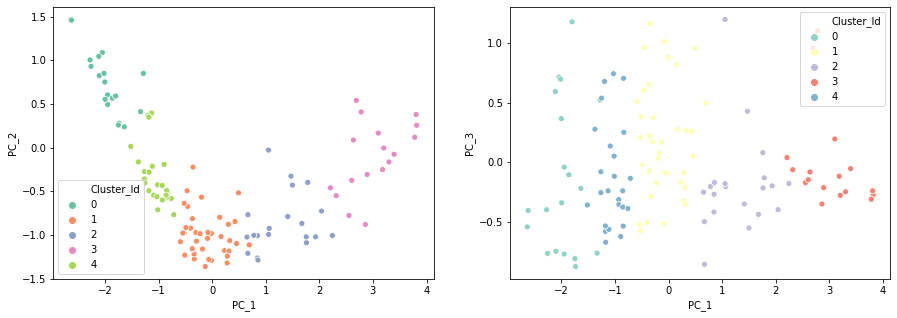

In [77]:
# Scatter plot on Principal components to visualize the spread of the data
fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id',legend='full',palette="Set2",data=df_pca_final,ax=axes[0])
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id',legend='full',palette="Set3",data=df_pca_final,ax=axes[1])
plt.show()

In [79]:
#Merging the df with PCA with original df

df_merge = pd.merge(ngo,df_pca_final,on='country')
df_merge_col = df_merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','Cluster_Id']]

# Creating df with mean values
cluster_child = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).child_mort.mean())
cluster_export = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).exports.mean())
cluster_import = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).imports.mean())
cluster_health = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).health.mean())
cluster_income = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).income.mean())
cluster_inflation = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).inflation.mean())         
cluster_lifeexpec = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).life_expec.mean())
cluster_totalfer = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).total_fer.mean())
cluster_gdpp = pd.DataFrame(df_merge_col.groupby(["Cluster_Id"]).gdpp.mean())

df_concat = pd.concat([pd.Series([0,1,2,3,4]),cluster_child,cluster_export,cluster_import,cluster_health,cluster_income
                       ,cluster_inflation,cluster_lifeexpec,cluster_totalfer,cluster_gdpp], axis=1)
df_concat.columns = ["Cluster_Id", "Child_Mortality", "Exports", "Imports","Health_Spending","Income","Inflation","Life_Expectancy","Total_Fertility","GDPpcapita"]
df_concat.head()

,Cluster_Id,Child_Mortality,Exports,Imports,Health_Spending,Income,Inflation,Life_Expectancy,Total_Fertility,GDPpcapita
0,0,73.884211,688.955989,602.859789,76.761663,3536.315789,10.930526,62.610526,4.705263,1583.842105
1,1,18.807895,2534.693684,2579.022368,392.042053,12597.894737,7.486605,73.921053,2.150263,6260.000000
2,2,7.140000,9374.470000,9371.095000,1442.029000,26050.000000,1.639550,76.915000,1.740000,18835.000000
3,3,5.141176,16736.111765,15324.935294,3954.500588,41705.882353,2.823647,80.476471,1.776471,40911.764706
4,4,40.068000,970.296741,1223.062844,164.852976,5849.200000,7.707200,67.116000,3.088000,2627.280000


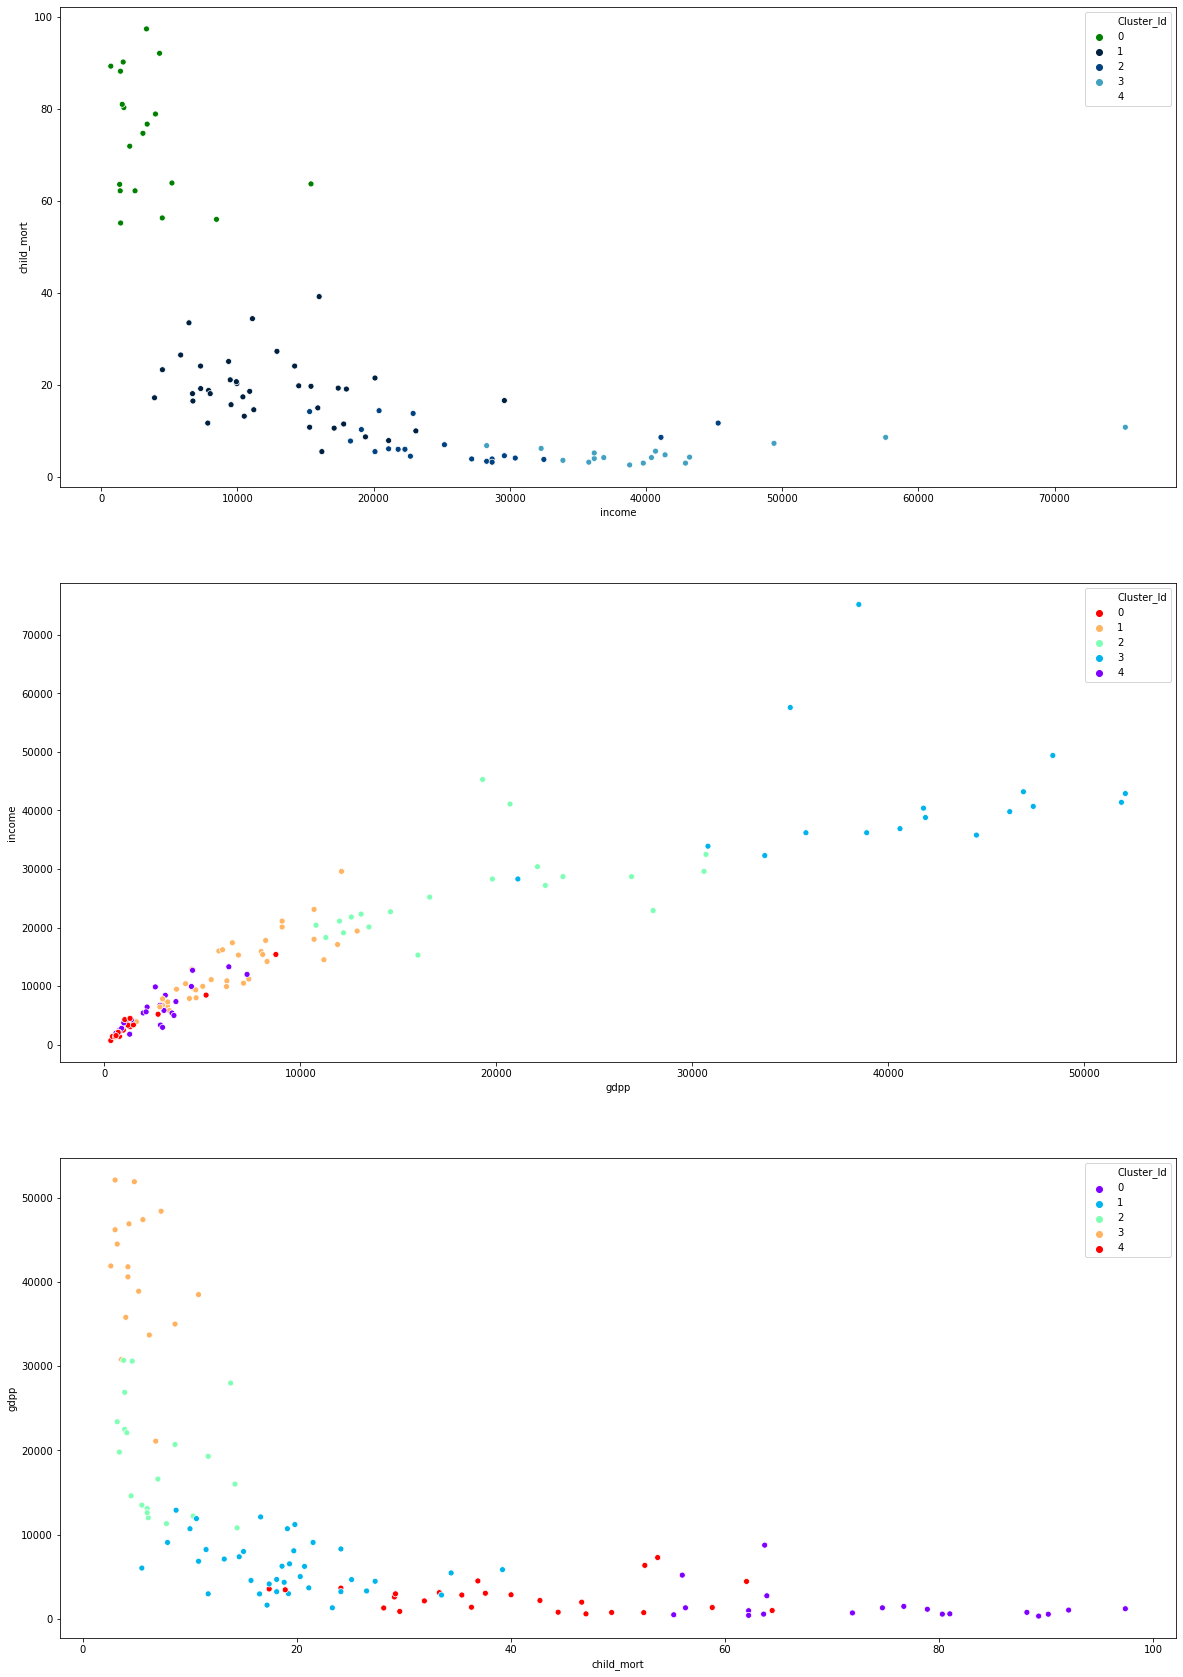

In [80]:
# Scatter plot on Original attributes to visualize the spread of the data

plt.figure(figsize = (20,30))
plt.subplot(3,1,1)
sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = df_merge_col,legend='full',palette="ocean")
plt.subplot(3,1,2)
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = df_merge_col,legend='full',palette="rainbow_r")
plt.subplot(3,1,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data=df_merge_col,legend='full',palette="rainbow")
plt.show()

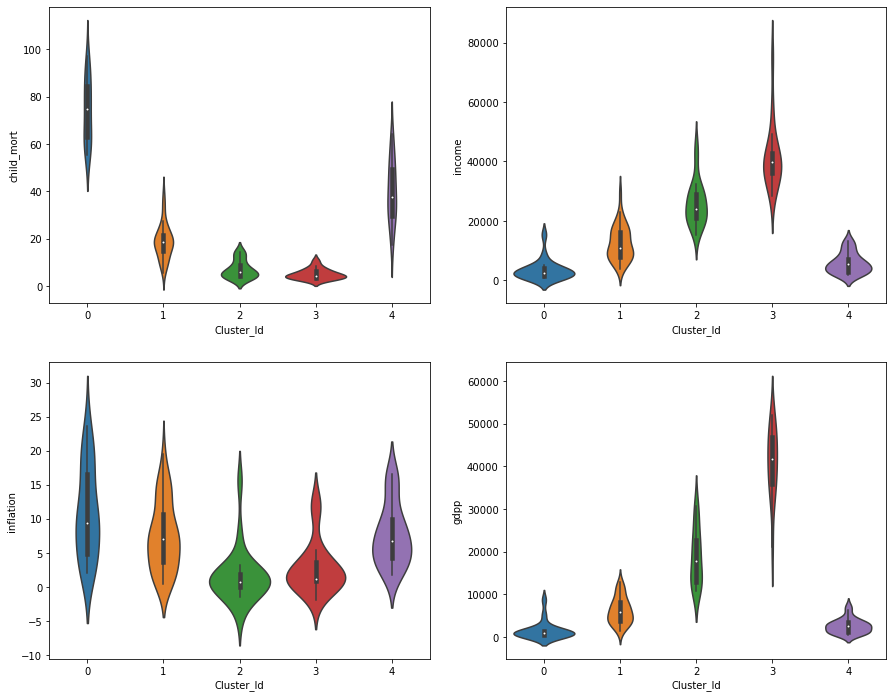

In [81]:
 #Violin plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.violinplot(x = 'Cluster_Id', y = 'child_mort', data = df_merge_col,ax=axes[0][0])
sns.violinplot(x = 'Cluster_Id', y = 'income', data = df_merge_col,ax=axes[0][1])
sns.violinplot(x = 'Cluster_Id', y = 'inflation', data=df_merge_col,ax=axes[1][0])
sns.violinplot(x = 'Cluster_Id', y = 'gdpp', data=df_merge_col,ax=axes[1][1])
plt.show()

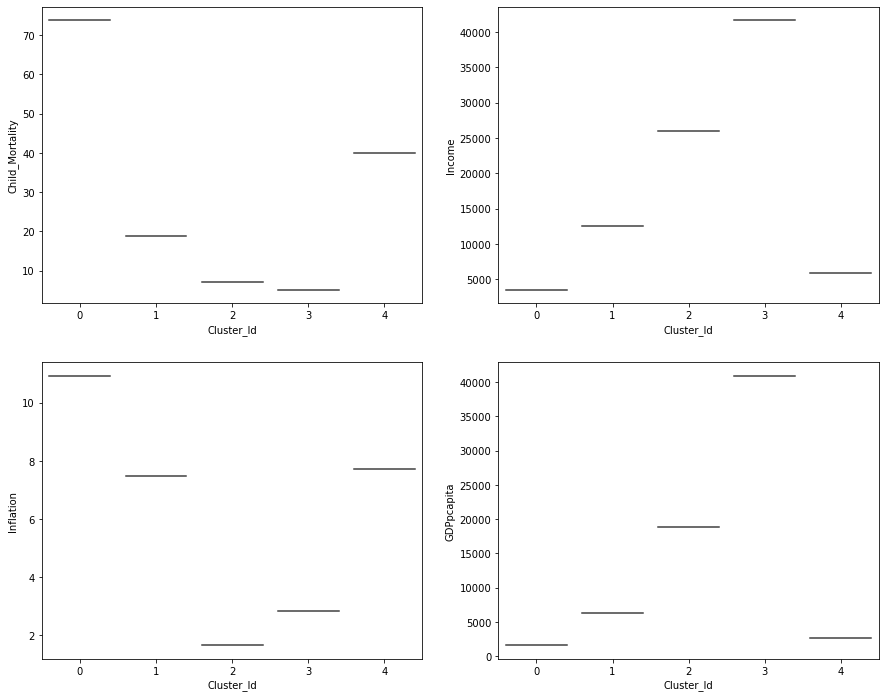

In [82]:
# Violin plot to visualise the mean value of few original attributes.

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.violinplot(x = 'Cluster_Id', y = 'Child_Mortality', data = df_concat,ax=axes[0][0])
sns.violinplot(x = 'Cluster_Id', y = 'Income', data = df_concat,ax=axes[0][1])
sns.violinplot(x = 'Cluster_Id', y = 'Inflation', data=df_concat,ax=axes[1][0])
sns.violinplot(x = 'Cluster_Id', y = 'GDPpcapita', data=df_concat,ax=axes[1][1])
plt.show()

# The mean values suggests the same story as above i.e.

Child Mortality is highest for Cluster 0 and Cluster 4.These clusters need some aid.
Income and Gdpp are measures of development. Higher the per capita income and gdpp 
better is the country's development. Income per capita and gdpp seems lowest for 
countries in clusters 0 and 4. Hence, these countries need some help.

In [83]:
# List of countries in Cluster 0

df_merge_col[df_merge_col['Cluster_Id']==0]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.44,56.2,5.82,553,0
24,Comoros,88.2,126.8850,397.573,34.6819,1410,3.87,65.9,4.75,769,0
25,"Congo, Rep.",63.9,2331.7400,1498.780,67.4040,5190,20.70,60.4,4.95,2740,0
33,Eritrea,55.2,23.0878,112.306,12.8212,1420,11.60,61.7,4.61,482,0
38,Gabon,63.7,5048.7500,1653.750,306.2500,15400,16.60,62.9,4.08,8750,0
39,Gambia,80.3,133.7560,239.974,31.9778,1660,4.30,65.5,5.71,562,0
42,Ghana,74.7,386.4500,601.290,68.3820,3060,16.60,62.2,4.27,1310,0
59,Kenya,62.2,200.1690,324.912,45.9325,2480,2.09,62.8,4.37,967,0
62,Lao,78.9,403.5600,562.020,50.9580,3980,9.20,63.8,3.15,1140,0
64,Liberia,89.3,62.4570,302.802,38.5860,700,5.47,60.8,5.02,327,0


In [84]:
# List of countries in Cluster 4

df_merge_col[df_merge_col['Cluster_Id']==4]

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
9,Bangladesh,49.4,121.28000,165.244000,26.6816,2440,7.14,70.4,2.33,758,4
13,Bhutan,42.7,926.50000,1541.260000,113.3600,6420,5.99,72.1,2.38,2180,4
14,Bolivia,46.6,815.76000,679.140000,95.8320,5410,8.78,71.6,3.20,1980,4
15,Botswana,52.5,2768.60000,3257.550000,527.0500,13300,8.92,57.1,2.88,6350,4
18,Cambodia,44.4,425.22600,467.670000,44.6448,2520,3.12,66.1,2.88,786,4
31,Egypt,29.1,553.80000,691.600000,121.1600,9860,10.10,70.5,3.19,2600,4
35,Fiji,24.1,2109.70000,2332.350000,177.3900,7350,4.23,65.3,2.67,3650,4
45,Guatemala,35.4,730.14000,1027.290000,193.8550,6710,5.14,71.3,3.38,2830,4
46,Guyana,37.6,1562.56000,2404.640000,163.5520,5840,5.73,65.5,2.65,3040,4
49,India,58.8,305.10000,365.850000,54.6750,4410,8.98,66.2,2.60,1350,4


# Now We will apply Hierarchial Clustering to see if we get any better clusters or not.

Hierarchical Clustering
Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,

Divisive
Agglomerative.

In [85]:
df_pca_final_data.head()

,PC_1,PC_2,PC_3
0,-2.637442,1.469038,-0.541359
1,-0.457626,-0.673301,0.961867
2,0.649849,-1.024374,-0.250103
3,-0.332692,-1.274517,0.176636
4,3.180362,-0.250785,-0.116877


# Single Linkage:
In single linkage hierarchical clustering, the distance between two clusters 
is defined as the shortest distance between two points in each cluster. For
example, the distance between clusters “r” and “s” to the left is equal to
the length of the arrow between their two closest points.

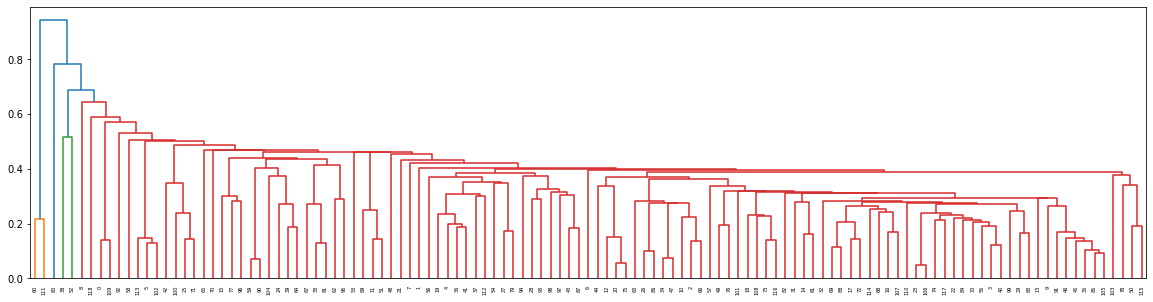

In [86]:
# Single linkage

mergings = linkage(df_pca_final_data, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

# Complete Linkage
In complete linkage hierarchical clustering, the distance between two 
clusters is defined as the longest distance between two points in each cluster.
For example, the distance between clusters “r” and “s” to the left is equal to 
the length of the arrow between their two furthest points

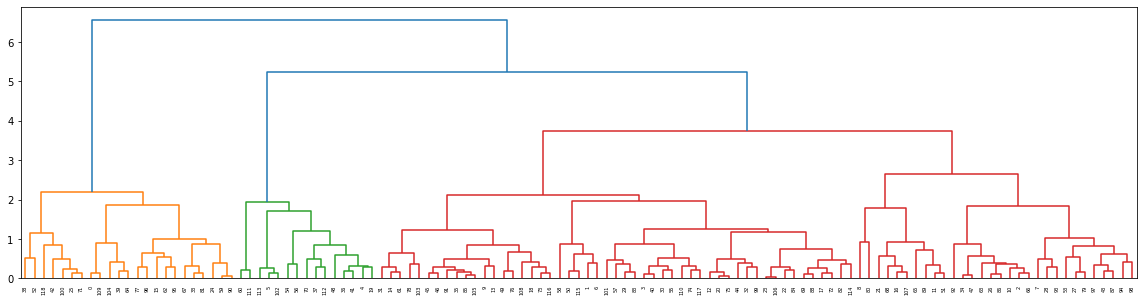

In [88]:
#Complete Linkage

mergings = linkage(df_pca_final_data, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [89]:
df_pca_hc = df_pca_final.copy()
df_pca_hc = df_pca_hc.drop('Cluster_Id',axis=1)
df_pca_hc.head()

,country,PC_1,PC_2,PC_3
0,Afghanistan,-2.637442,1.469038,-0.541359
1,Algeria,-0.457626,-0.673301,0.961867
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103
3,Armenia,-0.332692,-1.274517,0.176636
4,Australia,3.180362,-0.250785,-0.116877


In [90]:
# Let cut the tree at height of approx 3 to get 4 clusters and see if it get any better cluster formation.

clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
df_hc = pd.concat([df_pca_hc, clusterCut], axis=1)
df_hc.columns = ['country', 'PC_1', 'PC_2','PC_3','Cluster_Id']

In [91]:
df_hc.head()

,country,PC_1,PC_2,PC_3,Cluster_Id
0,Afghanistan,-2.637442,1.469038,-0.541359,0
1,Algeria,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,2
3,Armenia,-0.332692,-1.274517,0.176636,1
4,Australia,3.180362,-0.250785,-0.116877,3


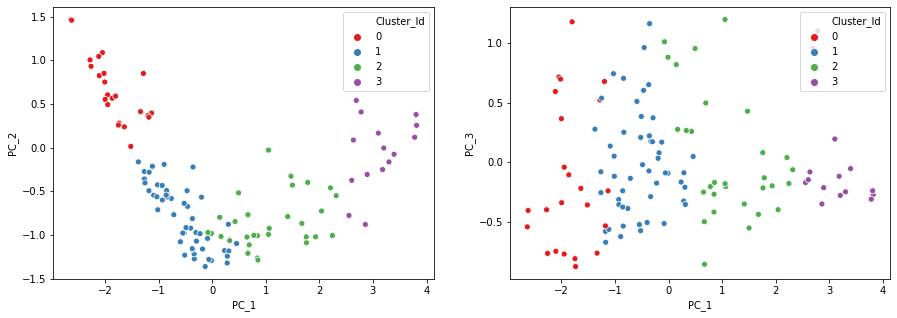

In [92]:
# Scatter plot on Principal components to visualize the spread of the data

fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.scatterplot(x='PC_1',y='PC_2',hue='Cluster_Id',legend='full',palette="Set1",data=df_hc,ax=axes[0])
sns.scatterplot(x='PC_1',y='PC_3',hue='Cluster_Id',legend='full',palette="Set1",data=df_hc,ax=axes[1])
plt.show()

In [96]:
#Merging the df with PCA with original df

df_merge_hc = pd.merge(ngo,df_hc,on='country')
df_merge_col_hc = df_merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','Cluster_Id']]

In [97]:
df_merge_col_hc.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.30,248.297,41.9174,1610,9.44,56.2,5.82,553,0
1,Algeria,27.3,1712.64,1400.440,185.9820,12900,16.10,76.5,2.89,4460,1
2,Antigua and Barbuda,10.3,5551.00,7185.800,735.6600,19100,1.44,76.8,2.13,12200,2
3,Armenia,18.1,669.76,1458.660,141.6800,6700,7.77,73.3,1.69,3220,1
4,Australia,4.8,10276.20,10847.100,4530.8700,41400,1.16,82.0,1.93,51900,3


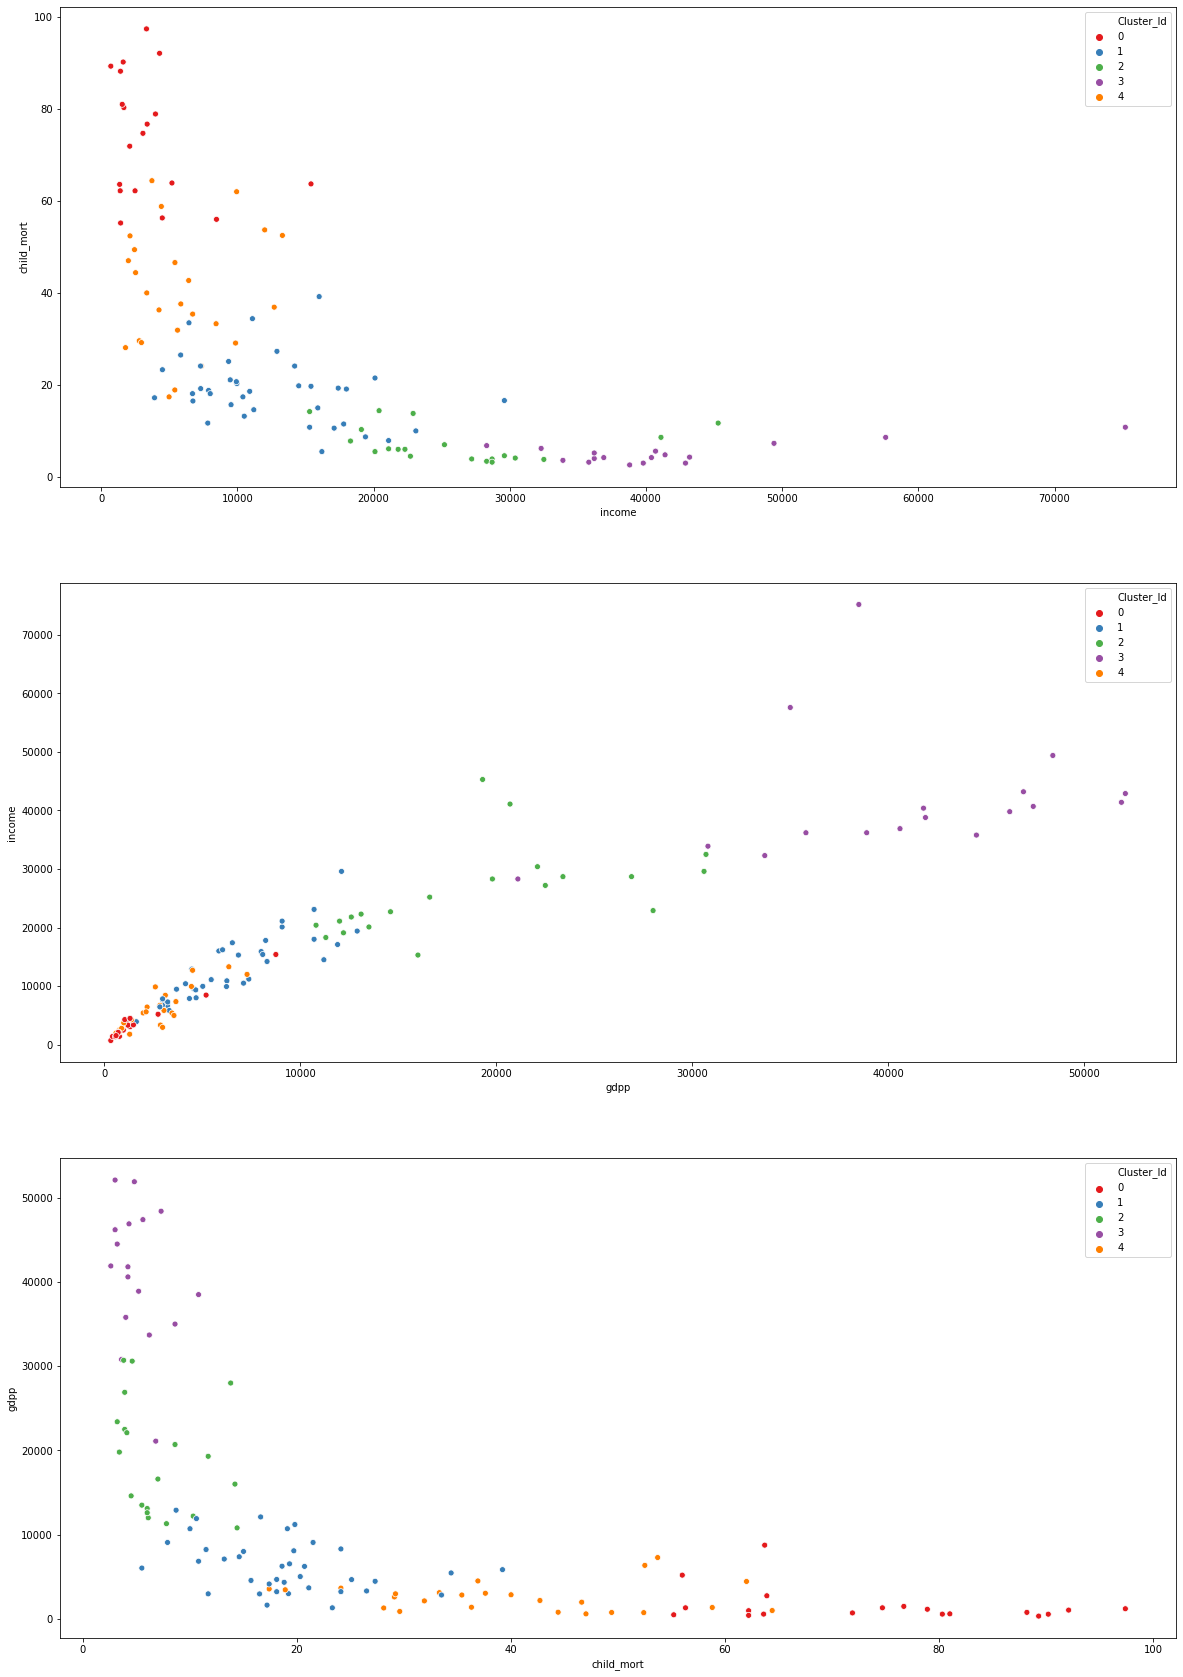

In [98]:
# Scatter plot on Original attributes to visualize the spread of the data
plt.figure(figsize = (20,30))
plt.subplot(3,1,1)
sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = df_merge_col_hc,legend='full',palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = df_merge_col_hc,legend='full',palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data=df_merge_col_hc,legend='full',palette="Set1")
plt.show()

# Final Analysis
We got Cluster 0 and Cluster 4 which are in need of aid.

In [99]:
df_clus0 = df_merge_col[df_merge_col['Cluster_Id'] ==0]
df_clus0.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.44,56.2,5.82,553,0
24,Comoros,88.2,126.8850,397.573,34.6819,1410,3.87,65.9,4.75,769,0
25,"Congo, Rep.",63.9,2331.7400,1498.780,67.4040,5190,20.70,60.4,4.95,2740,0
33,Eritrea,55.2,23.0878,112.306,12.8212,1420,11.60,61.7,4.61,482,0
38,Gabon,63.7,5048.7500,1653.750,306.2500,15400,16.60,62.9,4.08,8750,0


In [100]:
df_clus4 = df_merge_col[df_merge_col['Cluster_Id'] ==4]
df_clus4.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
9,Bangladesh,49.4,121.280,165.244,26.6816,2440,7.14,70.4,2.33,758,4
13,Bhutan,42.7,926.500,1541.260,113.3600,6420,5.99,72.1,2.38,2180,4
14,Bolivia,46.6,815.760,679.140,95.8320,5410,8.78,71.6,3.20,1980,4
15,Botswana,52.5,2768.600,3257.550,527.0500,13300,8.92,57.1,2.88,6350,4
18,Cambodia,44.4,425.226,467.670,44.6448,2520,3.12,66.1,2.88,786,4


In [101]:
# List of countries which need help

df_append= df_clus0.append(df_clus4)
df_append.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.3000,248.297,41.9174,1610,9.44,56.2,5.82,553,0
24,Comoros,88.2,126.8850,397.573,34.6819,1410,3.87,65.9,4.75,769,0
25,"Congo, Rep.",63.9,2331.7400,1498.780,67.4040,5190,20.70,60.4,4.95,2740,0
33,Eritrea,55.2,23.0878,112.306,12.8212,1420,11.60,61.7,4.61,482,0
38,Gabon,63.7,5048.7500,1653.750,306.2500,15400,16.60,62.9,4.08,8750,0


In [102]:
df_append.describe()

,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,54.670455,848.808689,955.247888,126.813545,4850.454545,9.099091,65.170455,3.786364,2176.704545,2.272727
std,21.361295,1057.917249,870.321039,141.303826,3589.256550,5.708000,4.553842,1.062332,1929.162110,2.004224
min,17.400000,1.076920,0.651092,12.821200,700.000000,1.720000,54.300000,2.330000,327.000000,0.000000
25%,36.750000,130.176750,252.994250,43.646850,2105.000000,4.227500,62.075000,2.867500,766.250000,0.000000
50%,54.450000,438.830000,640.215000,68.120000,3850.000000,8.785000,65.700000,3.555000,1330.000000,4.000000
75%,66.275000,946.725000,1547.242500,157.831750,5985.000000,11.825000,68.575000,4.602500,2987.500000,4.000000
max,97.400000,5048.750000,3257.550000,650.832000,15400.000000,23.600000,72.100000,6.150000,8750.000000,4.000000


In [103]:
# Based on final clusters information we are going to deduce the final list.
# We observed that mean child mortality is 54.67 for the selected clusters and hence 
# let's take all the countries with more than this child mortality .

df_final_list = ngo[ngo['child_mort']>55]
df_final_list.shape

(47, 10)

In [104]:
df_final_list.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231


In [105]:
# Let's check the demographic of the resultant data again

df_final_list.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,93.857447,821.899913,85.743751,727.775151,3518.361702,11.731596,59.661702,4.961489,1680.851064
std,32.242908,2283.329458,126.306474,1514.707514,5239.428061,15.553125,6.577120,1.108271,2765.543330
min,55.200000,1.076920,12.821200,0.651092,609.000000,0.885000,32.100000,2.410000,231.000000
25%,64.150000,101.515500,31.962100,185.067000,1390.000000,3.715000,57.050000,4.440000,550.000000
50%,90.200000,180.404000,46.495000,302.802000,1870.000000,8.790000,60.400000,5.060000,897.000000
75%,111.000000,398.280000,68.120000,545.140000,3545.000000,16.350000,63.900000,5.635000,1330.000000
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,104.000000,71.100000,7.490000,17100.000000


In [106]:
# We observed that mean income is 3518.36 for the selected clusters and hence 
# let's take all the countries with less than this income .

df_final_list1 = df_final_list[df_final_list['income']<=3519]
df_final_list1.shape

(35, 10)

In [107]:
df_final_list1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310


# Let's check the demographic of the resultant data again

In [108]:
df_final_list1.describe()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,98.720000,190.761400,56.936277,352.976029,1735.800000,8.491286,58.377143,5.252571,831.200000
std,32.886988,159.715094,56.727776,280.167208,769.189482,6.690649,6.957057,0.897743,606.557199
min,55.200000,20.605200,12.821200,90.552000,609.000000,0.885000,32.100000,3.300000,231.000000
25%,75.700000,80.351500,31.512200,170.534000,1215.000000,2.790000,56.250000,4.810000,470.500000
50%,90.500000,131.985000,41.917400,254.560000,1540.000000,6.390000,58.700000,5.210000,648.000000
75%,112.500000,224.584500,57.857500,400.286500,2135.000000,12.200000,62.000000,5.765000,1085.000000
max,208.000000,617.320000,328.320000,1190.510000,3370.000000,26.500000,71.100000,7.490000,3600.000000


In [109]:
# We observed that mean gdpp is 831.2 for the selected clusters and hence 
# let's take all the countries with less than this gdpp .

df_final_list2 = df_final_list1[df_final_list1['gdpp']<=832]
df_final_list2.shape

(23, 10)

In [110]:
df_final_list2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446


In [111]:
df_final_list2.sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True],inplace=True)
df_final_list2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708
112,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348


# Final List of countries which are in need of the aid based on socio-economic factors.

In [112]:
df_final_list2['country']

66                        Haiti
132                Sierra Leone
31     Central African Republic
97                         Mali
112                       Niger
37             Congo, Dem. Rep.
25                 Burkina Faso
64                Guinea-Bissau
17                        Benin
63                       Guinea
106                  Mozambique
26                      Burundi
94                       Malawi
150                        Togo
0                   Afghanistan
88                      Liberia
36                      Comoros
155                      Uganda
56                       Gambia
147                    Tanzania
126                      Rwanda
93                   Madagascar
50                      Eritrea
Name: country, dtype: object

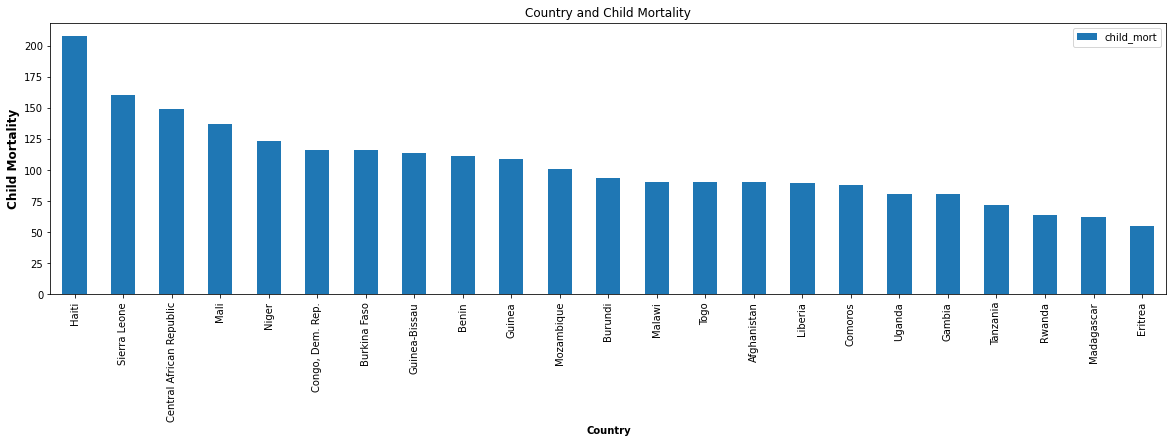

In [113]:
# BarPlot for Child Mortality of countries which are in need of aid

df_list_cm = pd.DataFrame(df_final_list2.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
df_list_cm.plot.bar()
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

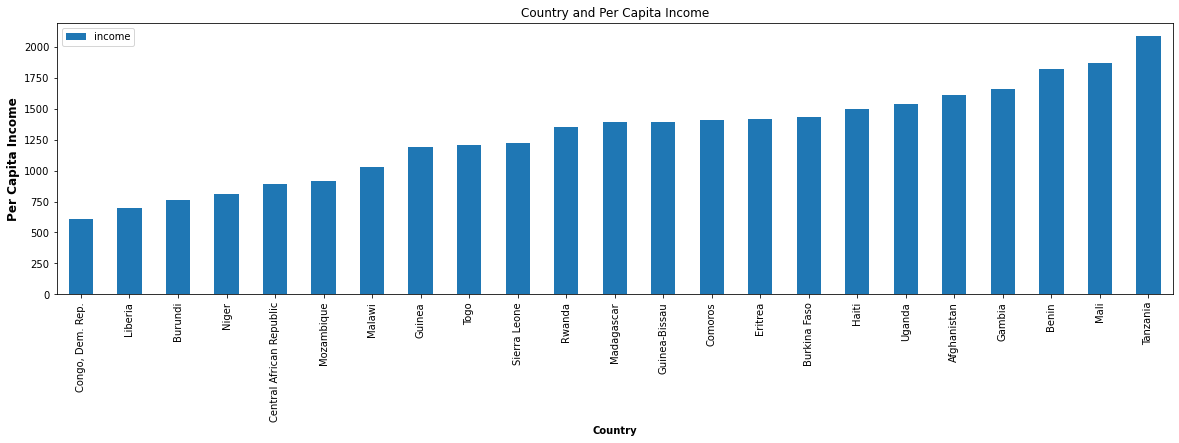

In [115]:
#BarPlot for Per Capita Income of countries which are in need of aid

df_list_in = pd.DataFrame(df_final_list2.groupby(['country'])['income'].mean().sort_values(ascending = True))
df_list_in.plot.bar()
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

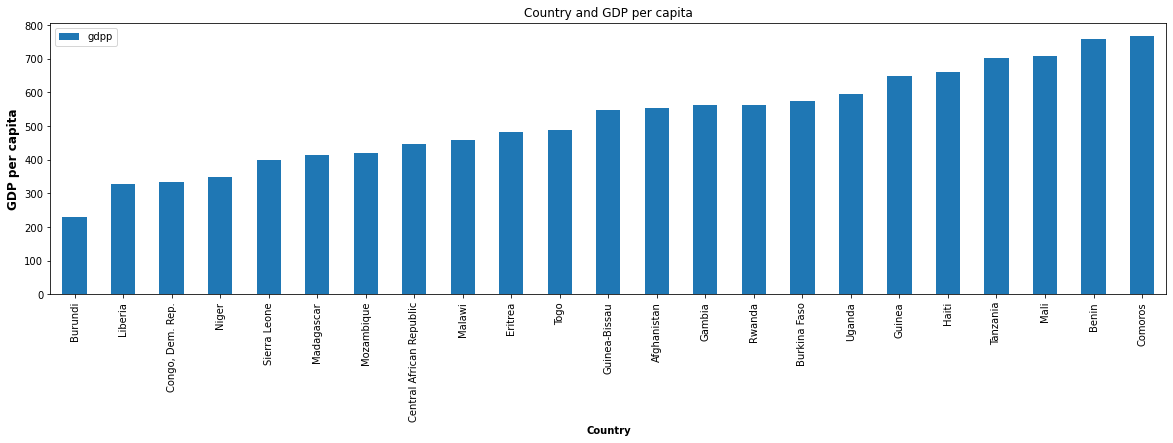

In [116]:
# BarPlot for gdp which are in need of aid

df_list_gdp = pd.DataFrame(df_final_list2.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
df_list_gdp.plot.bar()
plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

# Conclusion
We have used PCA above to reduce the variables involved and then done the clustering of 
countries based on those Principal components and then later we identified few factors like
child mortality, income etc which plays a vital role in deciding the development status of
the country and builded clusters of countries based on that. Based on those clusters we have 
identified the below list of countries which are in dire need of aid. The list of countries are
subject to change as it is based on the few factors like Number of components chosen, Number of 
Clusters chosen, Clustering method used etc.which we have used to build the model.

In [117]:
# Final countries list
df_final_list2.reset_index(drop=True).country[:5]

0                       Haiti
1                Sierra Leone
2    Central African Republic
3                        Mali
4                       Niger
Name: country, dtype: object

156